# Design, parametrization and Selection of Behavioral model

### Teacher
Gilles Bailly

### Requirements
- HCI basics
- python programming
- Mathematics basics (probability, log, exp, min, max etc.)
- Reinforcement learning (very basics)

### Libraries
- tested with python: 3.7,
- numpy: 1.25.0, pandas: 1.4.2, matplotlib: 3.5.3, seaborn: 0.11.2, scipy: 1.10.1

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import scipy
import random
from scipy.optimize import brute, differential_evolution
import time
import math
from sklearn.metrics import mean_squared_error
print('Python version', sys.version)
print('numpy:', np.__version__, ', pandas:', pd.__version__, ', matplotlib:', matplotlib.__version__, ', seaborn:', sns.__version__, ', scipy:', scipy.__version__)     


Python version 3.8.2 (default, Mar 26 2020, 10:43:30) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy: 1.22.4 , pandas: 1.2.0 , matplotlib: 3.6.2 , seaborn: 0.12.1 , scipy: 1.7.3


### Objective
The goal of this exercise is to provide guidelines when building and testing models to predict and explain human behavior.

### Acquired skills at the end of the exercise
- Use simple reinforcement learning models often used in decision making and neurosciences
- Develop models for sequential decision making
- Simulate models
- Adjust the parameters of a model
- Compare models with the tools log-likelihood and BIC score
- Use parameter recovery and model recovery

### Organization
This exercise is divided into six parts:
- Part 1: Familiarization with the data (10mn)
- Part 2: My first very simple model (5mn)
- Part 3: Parameter fits (60mn)
- Part 4: Model comparison and selection (30mn)
- Part 5: Model simulation (30mn)
- Part 6: Model evaluation - step-by-step (30mn)

### Scientific articles
- Wilson, R. C., & Collins, A. G. (2019). 
Ten simple rules for the computational modeling of behavioral data. 
Elife, 8, e49547
- Tovi Grossman, Pierre Dragicevic, and Ravin Balakrishnan. 2007. Strategies for accelerating on-line learning of hotkeys. ACM CHI '07. 1591–1600. https://doi.org/10.1145/1240624.1240865
- Gilles Bailly, Mehdi Khamassi, and Benoît Girard. 2023. Computational Model of the Transition from Novice to Expert Interaction Techniques. ACM Trans. Comput.-Hum. Interact. 30, 5, Article 66 (October 2023), 33 pages. https://doi.org/10.1145/3505557
-	Gilles Bailly, Eric Lecolinet, and Laurence Nigay. 2016. Visual Menu Techniques.  ACM Comput. Surv. 49, 4, Article 60 (February 2017), 41 pages. https://doi.org/10.1145/30021715
-	Adrian E Raftery. 1995. Bayesian model selection in social research. Sociological methodology (1995), 111–163.

<img style="float: right;margin-left:20pt;width:25%" src="images/learning_decision.png">

# PART 0: Context (1mn)

### Questions?

Do I use my experience or google Maps to choose my route?

Do I answer my email on my smartphone or on my PC?

Do I use the Da Vinci Surgical Robot to operate my patient or 
the traditional laparoscopic instruments?

How do I reach this object with my robotic prosthesis?

Do I use Menu or keyboard shortcut?

<div class="alert alert-block alert-success"> 
<strong>Question:</strong> What do these questions have in common?
</div>


### HCI and Interaction model
HCI is about: 
- understanding human behavior with interactive systems
- designing new forms of interaction.

Interaction models are essential for
- understanding and predicting user behavior and
- thus predicting the effectiveness of an interface.
- optimizing interfaces during the design phase or
- dynamically adapt the interfaces during the interaction.

# PART 1 : FAMILIARIZATION WITH THE DATA (10mn)



### Expert interaction technniques, eg. keyboard shortcuts

<div  style="float:right;margin-left:20pt; width:450px"> 
    <img style="width:100%" src="images/audio_menu.png"><br/>
    <strong>Figure 1:</strong> Interaction technique playing the kebyoard shortcut when a command is executed from the menu [Grossman et al. 2007]
    </div>

How to motivate users to adopt efficient expert interaction techniques to accomplish a task? 

Typically, keyboard shortcuts, e.g. Ctrl+S for the Save command, are particularly effective. Unfortunately, they are seldom used: many users, even experts, continue to use menus rather than making the transition to keyboard shortcuts.
Many interaction techniques are regularly proposed to promote the use of keyboard shortcuts [Bailly et al. 2016]. 

For example, one interaction technique (audio feedback) plays the name of the keyboard shortcut when the command is selected in the menu (Figure 1) [Grossman et al. 2007].


### Data

<div  style="float:right;margin-left:20pt; width:450px"> 
<img src="images/task.png" width="400"/><br/>
<strong>Figure 2:</strong> A trial. The stimulus is displayed at the bottom of the screen. The participant execute the command either with the menu or, if she knows it, with its corresponding keyboard shortcut [Grossman et al. 2007]    
</div>

In [Grossman et al. 2007], the authors conducted an experimental study to compare several interaction techniques to promote the use of keyboard shortcuts (Figure 2). The authors compare three techniques (Traditional, Audio, Disable). Each participant tests only one technique and execute 720 commands (each command has different frequencies. Some commands appear frequently, others rarely). In this exercise, we only consider the Audio technique (Figure 1). 

At each attempt, the target command appears at the bottom of the screen and the user executes it either with the MENU method or with the SHORTCUT method (Figure 2). But, from a cognitive point of view, we consider that the user chooses one of these three strategies:

### Srategies

- MENU: I select the command with the MENU method.
- SHORTCUT: I select the command with the Keyboard shortcuts method
- LEARNING: I learn the keyboard shortcut but execute the command in the menu (it takes more time)

At each trial, the log contains the strategy (menu, shortcut, learning), the time and whether the command was executed correctly or not.


### Make sense of the data 

Let's have quick look at the data.

In [2]:
#load data
data = pd.read_csv( './data/audio_hotkey.csv' )
data.head()

,Unnamed: 0,participant,technique_name,block_id,trial_id,cmd_input,cmd_name,cmd_frequency,time,success,strategy
0,0,0,audio,0,0,0,Pencil,72,29.317,1,0
1,1,0,audio,0,1,1,Banana,36,2.540,1,0
2,2,0,audio,0,2,2,Karate,24,3.304,1,0
3,3,0,audio,0,3,3,Strawberry,144,5.144,1,0
4,4,0,audio,0,4,1,Banana,36,3.039,1,0


The columns corresponding to the experimental design:
- participant: id of the participant
- technique_name: the name of the technique (in this exercise, we only consider audio)
- block_id: id of the block
- trial_id: id of the trial
- cmd_input: the id of the command to execute
- cmd_name: the name of the command to execute
- cmd_frequency : the number of occurecnces of this command

Logged data for each participant
- time: The time to execute the command (seconds)
- success: 1 if the participant successfully executed the command, 0 otherwise
- strategy: The most important column in this exerice. This column indicates the chosen strategy: Menu (0); Shortcut (1), Learning (2)

The following code provides the unique values for the most important columns

In [3]:
# print the summary
print( "Participant ids ( total=", len( data['participant'].unique() ), "): ", data['participant'].unique() )
print( "Technique :"        , data['technique_name'].unique()[0] )
print( "Number of blocks:"  , data[ 'block_id' ].max()+1 )
print( "Number of trials:"  , data[ 'trial_id' ].max() + 1 )
print( "Command ids: "      , data[ 'cmd_input' ].unique() )
print( "Command names:"     , data[ 'cmd_name' ].unique() )
print( "Command occurences:", np.sort( data[ 'cmd_frequency' ].unique() ) )
print( "Strategy values:"   , np.sort( data[ 'strategy' ].unique() ) )

Participant ids ( total= 14 ):  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Technique : audio
Number of blocks: 12
Number of trials: 720
Command ids:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Command names: ['Pencil' 'Banana' 'Karate' 'Strawberry' 'Cards' 'Corn' 'Mouse' 'Coat'
 'Sweater' 'Garlic' 'Frog' 'Dolphin' 'Clock' 'Camel']
Command occurences: [ 12  24  36  48  72 144]
Strategy values: [0 1 2]




#### Analysis at the poplulaion level
The most common analysis in this type of articles is to compare the evolution of shortcut use per block (each block contains 60 trials). We expect the participants to learn and use more shortcuts with practice. Is it the case?

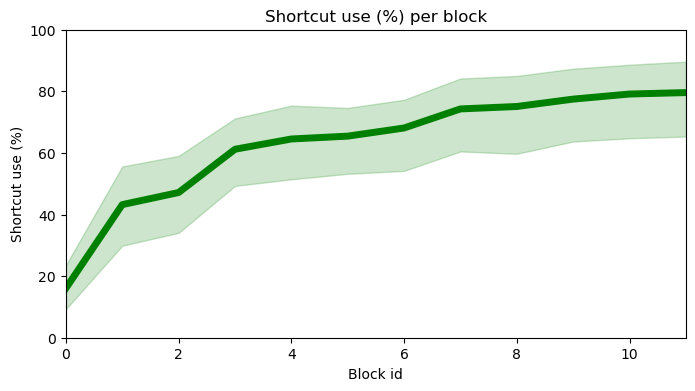

In [4]:
data [ 'shortcut use' ] = 0 #percentage
data.loc[ ( data[ 'success' ] == 1 ) & ( data[ 'strategy' ] == 1 ), 'shortcut use' ] = 100
data_view = data.groupby( [ "block_id" , "participant"] ).mean('shortcut use' )
data_view = data_view.reset_index()

plt.rcParams["figure.figsize"] = [8.0, 4.0]
rel = sns.lineplot( data = data_view, x = 'block_id', y = 'shortcut use', linewidth = 5, color = "green" )
info = rel.set( title= 'Shortcut use (%) per block', xlabel = "Block id", ylabel= "Shortcut use (%)", ylim = [0,100], xlim = [0,11] )

As expected, at the **population** level (the data of the 14 participants are aggregaed), shortcut use increases wih practice. However, the large confidence inerval suggests different user behaviors. Let analyze the data at the **individual** level

#### Analysis at the individual level

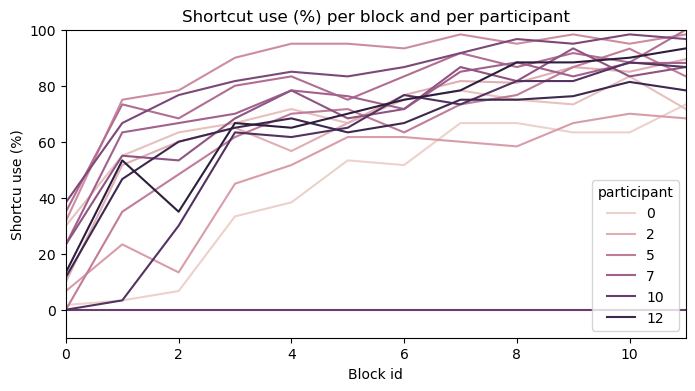

In [5]:
plt.rcParams["figure.figsize"] = [8.0, 4.0]
rel = sns.lineplot( data = data_view, x = 'block_id', y = 'shortcut use', hue = 'participant' )
f = rel.set( title= 'Shortcut use (%) per block and per participant', xlabel = "Block id", ylabel= "Shortcu use (%)", 
            ylim = [-10,100], xlim = [0,11] )

The 14 simple lines indicate the behavior of each participant. We observe quite different behvaiors. For instance P4 successfully executed shortcuts more than 85% of the time while P10 never successfully executed shortcuts. <strong>This is one key difficulty when elaborating models of decision making: users can have radically different strategies and <u>aggregating data does not always make sense</u>.<strong>

We can also visualize the data of a single participant to analyse how the different strategies (choices) evolve with practice (trial id) for each command.


<div class="alert alert-block alert-success">
<strong>TODO:</strong> Analyze the data of different participants, in particular, P5, P4 and P10
</div>

 

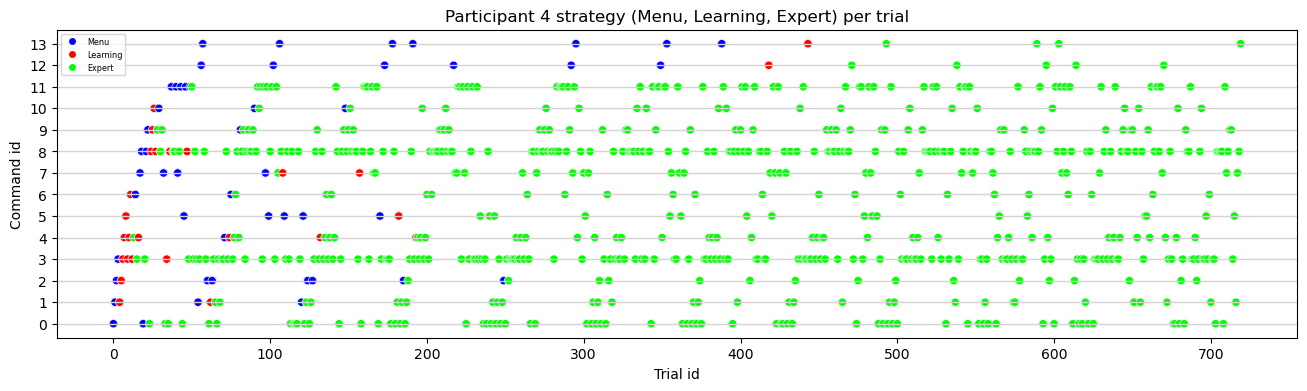

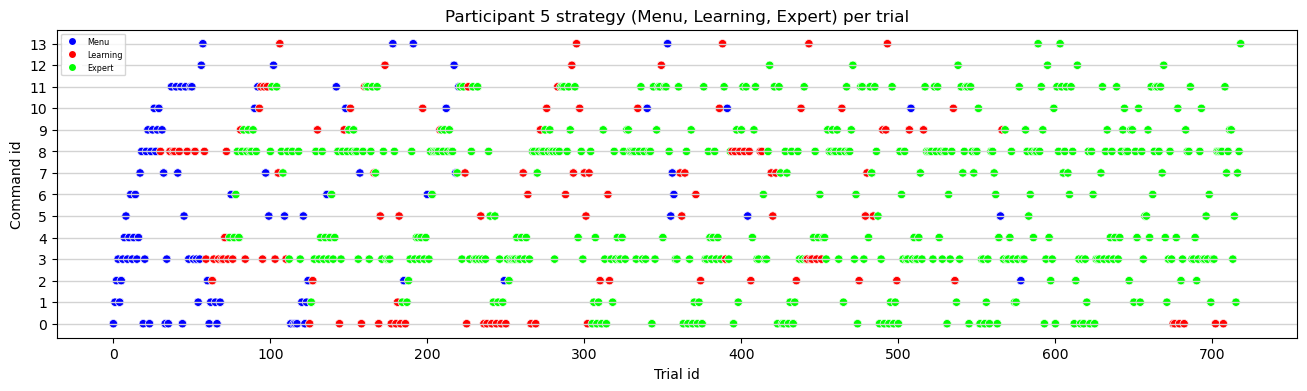

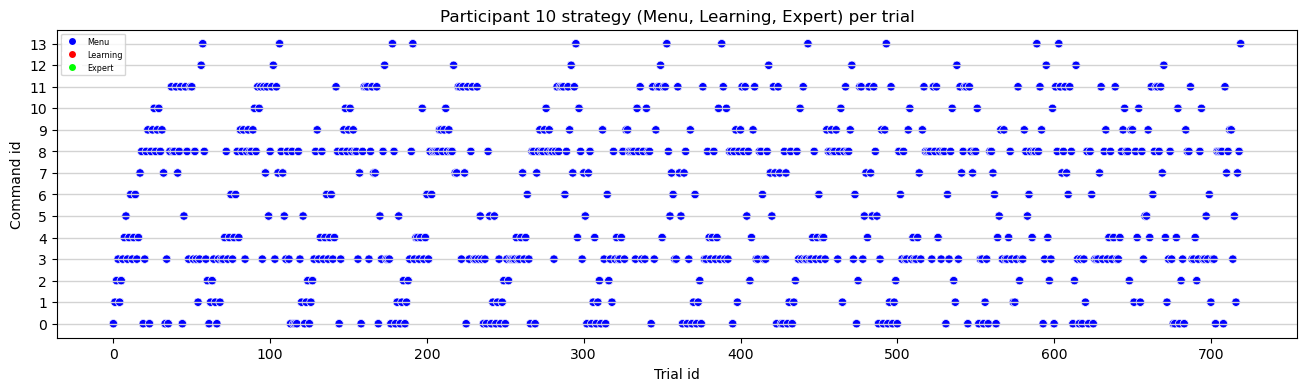

In [6]:
# Select a participant
for participant_id in [4,5,10]:

    df = data[ data[ 'participant' ] == participant_id ]

    # Color strategies: NOVICE 0: blue, EXPERT 1: green, LEARNING 2: red
    strategy_palette = { 0: (0, 0, 1), 1: (0, 1, 0), 2: (1, 0, 0) }

    plt.figure( figsize=(16, 4) )

    for cmd in df[ 'cmd_input' ].unique() :    
        plt.axhline( cmd, linewidth=1, color='lightgrey' )
        g = sns.scatterplot( x = 'trial_id', y = 'cmd_input', hue="strategy", palette = strategy_palette, data = df )
    g.set( title= f"Participant {participant_id} strategy (Menu, Learning, Expert) per trial", xlabel = "Trial id", ylabel= "Command id", yticks = np.arange(start=0, stop=14, step=1) )

    legend_lines = [Line2D( [0], [0], marker='o', color = "white", markerfacecolor=strategy_palette[ 0 ], lw=3),
                Line2D( [0], [0], marker='o', color = "white", markerfacecolor = strategy_palette[ 2 ], lw=3),
                Line2D( [0], [0], marker='o', color = "white", markerfacecolor = strategy_palette[ 1 ], lw=3)]
    l = plt.legend(legend_lines, ['Menu', 'Learning', 'Expert' ], fontsize='xx-small', ncol = 1, loc = 'upper left')

We observe that:
- some commands are more frequent
- participants tend to choose MENU (blue) first, then LEARNING (red) and finally SHORTCUT (green).
- The evolution of the strategies depends on the command frequency and the participant id.

### More information
You can find more information in these articles [Grossman et al. 2007], [Bailly et al. 2017].


# PART 2: MY FIRST VERY BASIC MODEL (5mn)
<strong>Outline:</strong> 
<ol>
    <li> Problem formulation and approach</li>
    <li> First (very basic) model </li>
</ol>

<div  style="float:right;margin-left:20pt; width:450px"> 
    <img src="images/RL.png" width="100%"/>
    <strong>Figure 3</strong>: Reinforcement Learning (RL) Framework.
</div>

### 2.1 Problem formulation and approach
We formulate the problem of the transition from MENU to SHORTCUT as a <strong>Reinforcement Learning </strong> (RL) problem.

The interface is the environment and the user is the agent. 

Given a command s to execute (<strong>State</strong>), the agent chooses an <strong>Action</strong> (or strategy) among MENU, SHORTCUT and LEARNING. 

The <strong>Reward</strong> (here cost) r, is the time it takes the agent to execute the command (to simplify we make the assumption that the user does not make errors).



In [7]:
# State == command id (int)

# Action
class Action(object):
    MENU = 0
    SHORTCUT = 1
    LEARNING = 2

### 2.2 First (very basic) model
<strong> Biased Random model </strong>($M_R$).  This model chooses a random strategy with a bias for one of the options (here SHORTCUT). In our case, the bias is captured with the parameter $\theta$ which is between 0 and 1 such that the probability of using the strategy (action) a for the command c:

<!-- <div class="alert alert-block alert-info"> -->
$$  P(c, a^k) = \theta \quad  if \quad  k==SHORTCUT $$ 
$$ 
P(c, a^k) = \frac{1-  \theta }{2} \quad if \quad k == MENU \quad or \quad LEARNING $$
<!-- </div> -->
<strong> This model has a single parameter</strong>  $ \theta $. 

In [8]:
# dictionary containing the list of parameters (here only one, 'theta') and a default value (here 0.2) 
rand_parameter = { 'THETA': 0.2 }

###################################################
# parameter : dict< name, value>
# c         : command
# OUTPUT: res (np.array) len ( res ) == 3; np.sum( res ) = 1
#########################################
def rand_action_probability( parameter, c ) :
    theta = parameter[ 'THETA' ]
    return np.array( [(1 - theta) / 2, theta, (1 - theta) / 2 ] )
    

This model is clearly not realistic. For instance, It does not take into account the history of executed commands / chosen strategies. However, it will help us to understand the basics of modeling. 

<strong> How to choose the value of the parameter </strong> $\theta$?

<strong>Answer: Parameter fits!</strong>

# PART 3: Parameter fits (60mn)

<strong>The objective of this part is to identify the parameter values that best describe a sequence of observations </strong>

<ol>
<li> Sequence of observations </li>
<li> Likelihood </li>
<li> Log-Likelihood </li>
<li> Maximum Log-Likelihood </li>
<li> Computational solving </li>
<li> Conclusion </li>
    
</ol>

#### 3.1 Sequence of observations $X$
In the Grossman et al. experiment, a participant $p$ performs 720 trials. At each trial $t$, the participant chooses an action (strategy) producing an observation $x_{t}^p \in \{MENU, LEARNING, SHORTCUT\}$. The sequence of observations of the participant $p$ is thus: $X = X_{1:720}^p ={x_1^p,..., x_{720}^p}$.

<center><img src="images/sequence_observations.png" width="600"/></center> 

<center><strong>Figure 4:</strong> Example of a possible sequence of observations from participant 5 (considering only 8 trials for clarity)</center> 

#### 3.2 Likelihood $ \mathcal{L}$
The likelihood $ \mathcal{L}$ is a function computing how well a model (with its parameters) describes a sequence of observations. More precisely, $ \mathcal{L}(M_R, \theta, X) $ computes the probability of the model ($M_R$) with its parameters ($\theta$) to generate the <strong> whole sequence of observations </strong> ($X$) of a given participant. 

The probability of the model to generate all observations is the product of the probabilities to generate <strong>each observation</strong> :



$$\mathcal{L}(M_R, \theta, X) = P(M_R, \theta|X) = P(M_R, \theta | {x_1,..,x_{720}}) = \prod_{i=1:720} P(x=x_i | M_R, \theta ) )$$

(we simplified the Bayes theorem for this exercice)

<center><img src="images/likelihood.png" width="620"/></center> 

<strong>Figure 5:</strong> Estimation of the likelihood (0.00016384), considering $M_R$, $\theta=0.2$ <p/>

Notice that $\mathcal{L}(\theta, M_R | X) \in [0,1]$. The closer to 1, the better the model explains the data.

<div class="alert alert-block alert-success">
<strong>TODO:</strong> Implement the function likelihood. At this stage, ignore the argument T. Instead of returning only the likelihood, return both the likelihood and the vector of probabilities.
</div>

In [10]:
#################################
# m: Model. It is a function with two arguments : 
#        - parameter its set of parameters
#        - an observation (in our case the command c)
#        the function returns the probabilities of the model to generate ** each strategy **
# parameter: the set of parameters of the model m, 
# X: Sequence of observations (strategies)
# C: Sequence of commands
# T: Sequence of time (duration to execute the command with the chosen strategy)
# OUTPUT : [ likelihood, vector of probabilities ]
# At this stage, we ignore T
#################################
def likelihood( m, parameter, X, C, T) :
    prob_vec = np.ones( len(X) )

    #####################
    # TODO
    for idx in range( len( X ) ) :
        prob_vec[ idx ] = m( parameter, C[ idx ] )[ X[ idx ] ]
    l = np.prod( prob_vec )
    ######################
    return [ l, prob_vec ] 

<div class="alert alert-block alert-success">
<strong>TODO:</strong> We can now estimate the likelihood of the Biased Random model to generate the 20 first observations for different participants and different values of theta. 
</div>

In [12]:
p     = 5     # Participant 5
t_max = 720    # the first 20 trials
rand_parameter[ 'THETA' ] = 0.2

# select a subset of data
data = pd.read_csv( './data/audio_hotkey.csv' )
X     = data.loc[ (data.participant == p) & (data.trial_id < t_max), 'strategy'  ].to_numpy() # list of observed strategies
C     = data.loc[ (data.participant == p) & (data.trial_id < t_max), 'cmd_input' ].to_numpy() # list of commands
T     = data.loc[ (data.participant == p) & (data.trial_id < t_max), 'time'      ].to_numpy() # list of observed time

#estimate likelihood
likelihood( rand_action_probability, rand_parameter, X, C, T)

[0.0,
 array([0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
        0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
        0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
        0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
        0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
        0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2,
        0.2, 0.2, 0.2, 0.4, 0.2, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, 0.2, 0.4,
        0.2, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.2, 0.2, 0.4, 0.4,
        0.2, 0.4, 0.4, 0.2, 0.2, 0.4, 0.4, 0.2, 0.2, 0.4, 0.2, 0.4, 0.4,
        0.4, 0.2, 0.2, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.2, 0.4, 0.2, 0.2,
        0.4, 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, 0.2, 0.4,
        0.2, 0.4, 0.2, 0.2, 0.4, 0.4, 0.2, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2,
        0.2, 0.4, 0.4, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.2, 0.2,
        0.4, 0.4, 0.2, 0.2, 0.4, 0.2, 0.2, 0.

Why this likelihood is important, useful and appropriate? 

Because we really compute the probability to generate the <strong> whole </strong> sequence of observations. Two errors that we sometimes see: 
- estimating the probability of generating only the <strong>last</strong> observation, ignoring the capacity of the model to generate the N-1 observations. In our context, estimating the last observation is quite easy (It is likely to be SHORTCUT). What is complex / important is to predict all intermediate observations, in particular when users will choose LEARNING.
- estimating aggregate distributions. For instance, both the model and the participant produces 50% MENU, 25% LEARNING and 25% SHORTCUT. It is not sufficient because it does not consider the <strong> order </strong> of the sequence of observations. 

<center><img src="images/proportion.png" width="580"/></center> 

<center><strong>Figure 6:</strong> Two sequences of observations with the same distribution of strategies (50% MENU, 25% LEARNING and 25% SHORTCUT), but very different user behaviors.</center> 
<p/>

<div class="alert alert-block alert-success">
<strong>TODO: </strong> Now, estimate the likelihood of the 720 observations (t_max = 720) instead of 20. Do you see a problem?
<font color="red"> The likelihood is computed as the product of 720 probabilities. The product of 720 probabilities is very small. The computer will return 0. </font>
</div>
Let see if you have the same problem with log-likelihood...

#### 3.3 Log-Likelihood $log\mathcal{L}$
We introduce the log-likelihood  $log\mathcal{L}(\theta | X)$
$$log\mathcal{L}(\theta | X) = log( \mathcal{L}(\theta | X) ) $$
$$ log\mathcal{L}(\theta | X) = log( \prod_{i=1:720} P(x=x_i | \theta ) ) )  $$
$$ log\mathcal{L}(\theta | X) = \sum_{1:720} log P(x=x_i | \theta)  $$

$log\mathcal{L}$ is negative because $P \in [0,1]$. So, the closer to zero, better the model explains the data. 
The key property of the $log\mathcal{L}$ is that it relies on a sum ($\sum $) instead of a product ($\prod$).

<div class="alert alert-block alert-success">
<strong>TODO:</strong> implement the log_likelihood function.
</div>

In [15]:
#################################
# m:      Model func, (m has two arguments: it set of parameters and a command c)
# param:  Parameters of the model m, 
# X:      sequence of strategies (observations)
# C:      Sequence of commands
# T:      Sequence of time (duration to execute the command with the chosen strategy (observations)
# OUTPUT: [ log-likelihood, vector of probabilities ]
#################################
def log_likelihood( m, parameter, X, C, T):
    prob_vec = np.ones( len(X) )
    for i in range(0, len(X) ) :
        prob_vec[i] = m( parameter, C[i] )[ X[i] ]
    #################
    # TODO
    ll = np.sum( np.log(prob_vec) )
    #################
    return ll, prob_vec

<div class="alert alert-block alert-success">
<strong>TODO: </strong> Estimate the <strong>log-likelihood</strong> of the model to generate the 720 first observations of the P5 (and P6) for different values of theta. Do you still see a problem?
</div>

In [16]:
#select the 20 first observations (strategy) of the participant 5
p     = 5    # Participant 5
t_max = 720   # all trials
C     = data.loc[ (data.participant == p) & (data.trial_id < t_max), 'cmd_input' ].to_numpy()
X     = data.loc[ (data.participant == p) & (data.trial_id < t_max), 'strategy'  ].to_numpy()
T     = data.loc[ (data.participant == p) & (data.trial_id < t_max), 'time'      ].to_numpy()

rand_parameter[ 'THETA' ] = 0.2
log_likelihood( rand_action_probability, rand_parameter, X, C, T )

(-1002.61403777525,
 array([0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
        0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
        0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
        0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
        0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
        0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.2, 0.4, 0.4, 0.2,
        0.2, 0.2, 0.2, 0.4, 0.2, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, 0.2, 0.4,
        0.2, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.2, 0.2, 0.4, 0.4,
        0.2, 0.4, 0.4, 0.2, 0.2, 0.4, 0.4, 0.2, 0.2, 0.4, 0.2, 0.4, 0.4,
        0.4, 0.2, 0.2, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.2, 0.4, 0.2, 0.2,
        0.4, 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, 0.2, 0.4,
        0.2, 0.4, 0.2, 0.2, 0.4, 0.4, 0.2, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2,
        0.2, 0.4, 0.4, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.2, 0.2,
        0.4, 0.4, 0.2, 0.2, 0.4

Great! we now have a robust metric to estimate how well a model (with a given set of parameter) explains a sequence of observations.

<img style="float: right;margin-left:20pt;width:30%" src="images/optimisation.png">

#### 3.4 Maximum log-likelihood

Remember our goal: Find the value of the parameter $\theta$ that best explains the sequence of observations. Technically, it means to find  $\theta$ vaule that :
- maximizes the likelihood: $argmax_{\theta}( \mathcal{L}(\theta | X) )$
- maximizes the log-likelihood: $argmax_{\theta}( log\mathcal{L}(\theta | X) )$

In practice, <strong> how to explore the parameter space? and find $\theta$ that maximizes the log-likelihood? </strong>
We can try to do it manually (3.5) when the problem is simple, otherwise it requires computational solving (3.6).

#### 3.5 Manual solving
When the number of parameters is small (1,2, 3), it might be sufficient to <strong>manually</strong> explore the parameter space. In our context, we have a simple parameter $\theta$. we can thus easily find a $\theta$ maximizing the log-likelihood. It has two additional advantages:
- We can compare the results obtained manually with those obtained with an optimization method.
- We can visually explore the parameter space (plot log-likelihodd as a function of $\theta$)
and see if there are some local optima.

To **manually** find the best $\theta$ value (best_theta) and max $log\mathcal{L}$ (max_ll), we simply use a simple ``for'' loop as illustrated below. 


In [18]:
# subset of the data
p     = 5      # Participant 5
t_max = 720    # the first 20 trials
C     = data.loc[ (data.participant == p) & (data.trial_id < t_max), 'cmd_input' ].to_numpy()
X     = data.loc[ (data.participant == p) & (data.trial_id < t_max), 'strategy'  ].to_numpy()
T     = data.loc[ (data.participant == p) & (data.trial_id < t_max), 'time'      ].to_numpy()

EPS = 0.01   #used to avoid side effects

# Initial values
theta_vec  = np.linspace( EPS, 1-EPS, 20 ) # all theta values
ll_vec     = []   # vector containing the log_likelihood for all theta values
max_ll     = -1000000000
best_theta = 0

t = time.process_time()

################
# key part
for theta in theta_vec:
    rand_parameter[ 'THETA' ] = theta
    ll, prob_vec = log_likelihood( rand_action_probability, rand_parameter, X, C, T )
    ll_vec.append( ll )
    if ll > max_ll :
        max_ll = ll
        best_theta = theta
#################

manual_elapsed_time = round( time.process_time() - t, 3 )
manual_theta        = round( best_theta, 3)
manual_ll           = round( max_ll, 3)

print( "Method: Manual \t log_likelihood:", manual_ll, "\t theta:", manual_theta, "\t elasped time:", manual_elapsed_time ) 




Method: Manual 	 log_likelihood: -599.938 	 theta: 0.681 	 elasped time: 0.028


We can also plot the log-likelihood as a function of theta.

[Text(0.5, 0, 'Theta value'),
 Text(0, 0.5, 'Log likelihood'),
 Text(0.5, 1.0, 'View centered on the max log -likelihood')]

<Figure size 1600x200 with 0 Axes>

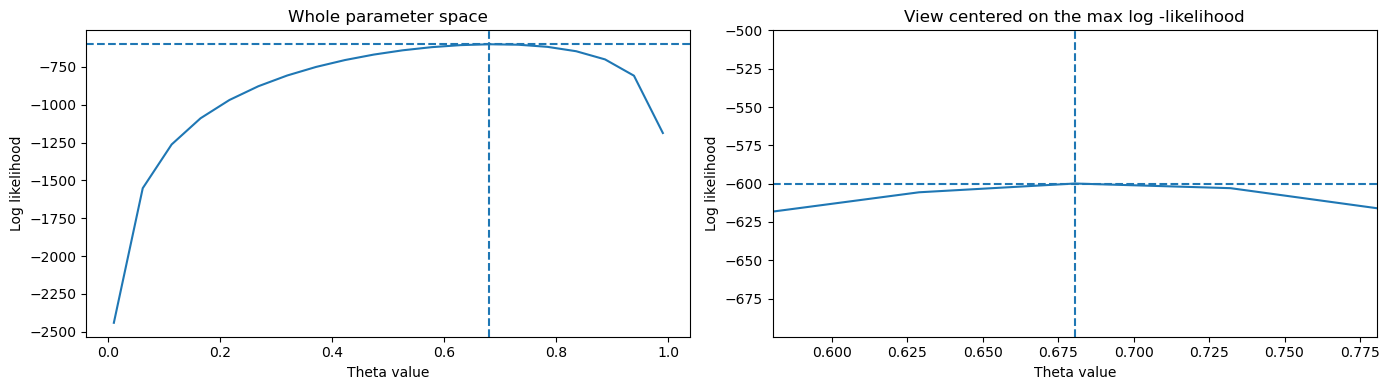

In [19]:
plt.rcParams["figure.figsize"] = [14.00, 4.0]
plt.rcParams["figure.autolayout"] = True
# plot the global view
f0 = plt.figure( figsize=(16, 2) )
f, axes = plt.subplots(1, 2)
axes[0].plot( theta_vec, ll_vec )
#axes[0].text( best_theta - 0.2, max_ll - 400, label ) 
axes[0].axhline( y = max_ll,     xmin=0, xmax=1, linestyle = "--" )
axes[0].axvline( x = best_theta, ymin=0, ymax=1, linestyle = "--" )
axes[0].set( xlabel= "Theta value", ylabel= "Log likelihood", title = "Whole parameter space" )

# plot the local view centered around the max log likelihood
delta_x = 0.1
delta_y = 100
x_min = best_theta - delta_x
x_max = best_theta + delta_x
y_min = max_ll - delta_y
y_max = max_ll + delta_y
axes[1].plot( theta_vec, ll_vec )
#axes[1].text( best_theta + delta_x / 2, ll_min -delta_y /2, label ) 
axes[1].axhline( y = max_ll,     xmin = 0, xmax = 1, linestyle = "--" )
axes[1].axvline( x = best_theta, ymin = 0, ymax = 1, linestyle = "--" )
axes[1].axis( xmin = x_min, xmax = x_max, ymin = y_min, ymax = y_max )
axes[1].set( xlabel= "Theta value", ylabel= "Log likelihood", title = "View centered on the max log -likelihood" ) 

Great! we found the best $\theta$ and max log-likelihood $log\mathcal{L}$.

#### 3.6 Computational solving 
Manually epxloring the design space might be challenging when the number of parameters is increasing. Several optimization functions are available in python, e.g. with the library scipy.optimize. They generally take as argument:
- func: an objective function to be <strong>minimized</strong> (not maximized...)
- bounds (or sometimes ranges):  (min, max) pairs defining the finite lower and upper bounds for the optimizing argument of func.

They return (at least) 
- the solution array x, ie. the array of parameter values minimizing func
- the minimal value of func: fun = func( x )

Several optimization approaches are available:
- grid search, but it becomes expensive in large parameter space
- gradient descent, but it can fall into local optima
- genetic algorithms (CMA-ES, NSGA-2), less prone to local optima.
- etc.

In this exercice, we will test <strong>brute</strong> (grid search) and <strong>differential evolution</strong> as optimisation method from scipy.optimize. We will check that 
- they return the same best_theta,
- they return the same max log-likelihood
- they are at least as fast as our naive implementation 

<div class="alert alert-block alert-success">
<strong>TODO 1</strong>: implement the method inv_log_likelihood, to be compatible with common optimization methods: (1) we want to minimize, not maximize; (2) the first argument should be an array of parameter values.

<strong>TODO 2</strong>: compare the grid search algorihm (brute) and the differential evolution algorithm (differential_evolution) with our default implementation.

<strong>TODO 3</strong>: Test smaller and larger values of Ns (number of grid points for each parameter) of the brute algorithm.
</div>

In [24]:
# subset of the data
p     = 5      # Participant 5
t_max = 720    # the first 720 trials
C     = data.loc[ (data.participant == p) & (data.trial_id < t_max), 'cmd_input' ].to_numpy()
X     = data.loc[ (data.participant == p) & (data.trial_id < t_max), 'strategy'  ].to_numpy()
T     = data.loc[ (data.participant == p) & (data.trial_id < t_max), 'time'      ].to_numpy()


param_names  = list( rand_parameter.keys() )
EPS = 0.01   #used to avoid side effects 

#################################
# Function to be minimized. To be compatible with the optimization method, 
# the function must be in the form f( param_values, *args), where param_values is a 1-D array of parameter values.
# In our context, args contains the arguments of log_likelihood (model, X, C, T)
# it requires also an additional argument param_names to maintain the link between parameter name et parameter values
# so len( param_values ) == len( param_values )
# return the inverse of log likelihood
#################################
def inv_log_likelihood( param_values, param_names, model, X, C, T ):
    ######################
    #TODO 1
    param = dict( zip( param_names, param_values ) )
    ######################
    return - log_likelihood( model, param, X, C, T )[0]


##################################
#              manual
##################################
print( "Method: Manual \t \t \t log_likelihood:", manual_ll, "\t theta:", manual_theta, "\t elasped time:", manual_elapsed_time ) 


t = time.process_time()

#####################
# TODO 2 (optimisation method: Brute force)
# scipy.optimize.brute(...)
# use the following arguments: func = ..., ranges = ..., args =..., Ns = 20, full_output=True, finish= None
res = brute(func=inv_log_likelihood, 
            ranges=( (EPS, 1-EPS), ), 
            args=( param_names, rand_action_probability, X, C, T ), 
            Ns=20, full_output=True, finish= None)
#####################

elapsed_time = time.process_time() - t
print( "Method: Brute (Grid search) \t log_likelihood:", - round( res[1], 3), "\t theta:", round( res[0], 3 ), "\t elasped time:", round( elapsed_time, 3 ) ) 

 
#################################
#    differential evolution
#################################
t = time.process_time()

#####################
# TODO 2 (optimisation method: Differential evolution)
# scipy.optimize.differential_evolution
# use the following arguments: func = ..., bounds = ..., args =...
# Notice that the ``bounds'' argument of differential_evolution is the equivalent to the ``ranges'' argument of brute
# res = differential_evolution(...)
res = differential_evolution( func = inv_log_likelihood, 
                              bounds = [(EPS, 1-EPS)], 
                              args = ( param_names, rand_action_probability, X, C, T ) )
##################### 

elapsed_time = time.process_time() - t
print( "Method: Differential evolution \t log_likelihood:", - round( res.fun, 3), "\t theta:", round( res.x[ 0 ], 3 ),  "\t elasped time:", round( elapsed_time, 3 ) ) 


Method: Manual 	 	 	 log_likelihood: -599.938 	 theta: 0.681 	 elasped time: 0.028
Method: Brute (Grid search) 	 log_likelihood: -599.938 	 theta: 0.681 	 elasped time: 0.03
Method: Differential evolution 	 log_likelihood: -599.793 	 theta: 0.69 	 elasped time: 0.084


#### 3.7 Conclusion
You are now able to compute the best parameter(s) and the log likelihood for a given model. While this is a very simple model with only one parameter, you can see the impact of the optimization method (and calibration) on parameter fits. 

<div class="alert alert-block alert-warning">
⚠️ You should be careful regarding <strong>Computational Solving</strong>. For some complex models with multiple parameters, you have sometimes to make a compromise between model plausability and computational solving.
</div>


# Part 4: Model comparison and selection (45mn)
<ol>
    <li> Soft max function </li>
    <li> Choice Kernel (CK) </li>
    <li> Rescorla-Wagner (RW) </li>
    <li> Comparing models with the log likelihood </li>
    <li> Comparing models with BIC score</li>
    <li> BIC score and significance</li>
    <li> Summary: reporting data </li>
</ol>

To compare models, we first need ... a set of candidate models. Let consider three additional basic models in computational neurosciences. But before that, let me introduce the softmax function which is useful for the following models.

#### 4.1 Soft max function
The softmax function converts a vector  $V$ of $k$ real numbers $V={v^1, v^2, ... v^k}$ into a probability distribution of k possible outcomes.

$$ P(v^i) = \frac{ exp( \quad \beta \times v^i \quad ) }{ \sum_{i=1}^k exp( \quad\beta \times v^i \quad ) } $$

where $\beta$ is the inverse temperature which is the level of stochasticity. $\beta = 0$ means that the choice is random. $\beta = \infty$ means the chosen option is the one with the largest value. Below the implementation of the softmax



In [26]:
##########################################################################
#                               Softmax                                  #
# Input:                                                                 #
#    - beta (float) : inverse temperature                                #
#    - values (np.array): list containing the values for each action     #
# Output:                                                                #
#    - probs (np.array) : the probability of each action to be chosen    #
########################################################################## 
MAX_EXP_FLOAT = np.log(sys.float_info.max)

def soft_max(beta, values):
    values = beta * values
    values = np.where( values < MAX_EXP_FLOAT, values, MAX_EXP_FLOAT) 
    return np.exp( values ) / max( np.sum( np.exp( values ), axis = 0 ), EPS)

<div class="alert alert-block alert-success">
<strong>TODO:</strong> if you are not familiar with softmax, you can test different value_vec and beta_vec and visualize the result.
</div>

Test soft_max with the values [0.1 0.4 0.5] for different values of beta


<Figure size 1600x200 with 0 Axes>

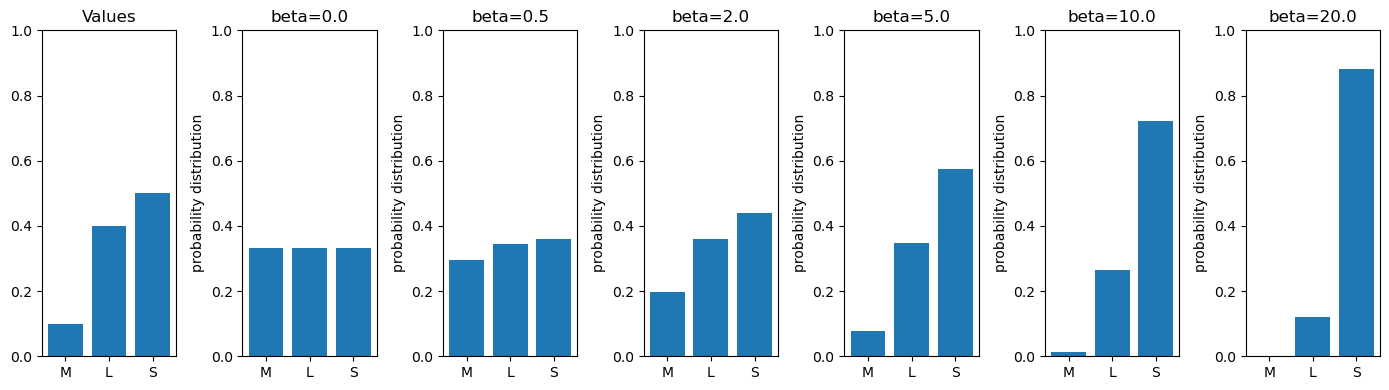

In [27]:
#######################
#TODO test soft_max
#######################
value_vec = np.array( [0.1, 0.4, 0.5] )
beta_vec  = np.array( [0, 0.5, 2, 5, 10, 20] )
print( "Test soft_max with the values",  value_vec, "for different values of beta" )

plt.rcParams["figure.figsize"] = [14.00, 4.0]
plt.rcParams["figure.autolayout"] = True
f0 = plt.figure( figsize=(16, 2) )
f, axes = plt.subplots(1, len(beta_vec) +1)
axes[0].bar( ["M", "L", "S"], value_vec )
axes[0].set( title="Values", ylim=[0,1])
for i in range(0, len(beta_vec) ) :
    axes[i+1].bar( ["M", "L", "S"], soft_max( beta_vec[i], value_vec ) )
    axes[i+1].set( title="beta=" + str(beta_vec[i]), ylabel= "probability distribution", ylim=[0,1] )

Information shared to all models:




In [28]:
n_command  = 14 # Number of commands
n_strategy = 3  # Number of strategies / actions (MENU, SHORTCUT, LEARNING)

#### 4.2 Choice Kernel (CK) model. 
This model, often used in neuroscience, **captures the user's tendency to repeat previous actions**. The user calculates a "choice kernel" $CK_t^k(c)$ that remembers the frequency of use of the strategy (or action) $k$ for the command $c$. 

<!-- <div class="alert alert-block alert-info"> -->
$$ CK_{t+1}^k(c) =  CK_t^k(c) + \alpha_{CK} (a_t^k - CK_t^k(c) )$$ 

where $a_t^k = 1$ if strategy $k$ is used in trial $t$, otherwise $a_t^k = 0$ and $ \alpha_{CK}$ is the learning rate.
<!-- </div> -->

To simplify, we consider that the initial value of the kernel choice is 0. We can then calculate the probability of executing the strategy $a$ for the command $c$ using the softmax function:

<!-- <div class="alert alert-block alert-info"> -->
$$ P(c, a^k) = \frac{ exp( \quad \beta_{CK} \times CK_t^k(c) \quad ) }{ \sum_{i=0}^2 exp( \quad\beta_{CK} \times CK_t^i(c) \quad ) } $$
where $\beta_{CK}$ is the inverse temperature defining the level of stochasticity. 
<!-- </div> -->
<strong>This model has two parameters</strong> ($\alpha_{CK}$, $\beta_{CK}$)

A key difference with the previous model is that <strong>the output of the model now depends on the CK values which are updated at each trial</strong>, ie. the output depends on the sequence of previous users choices.
<div class="alert alert-block alert-success">
<strong>TODO:</strong> Implement the CK model
</div>

In [30]:
CK_value      =  np.zeros( (n_command, n_strategy) )
CK_parameter  = { 'A_CK' : 0.2, 'B_CK': 2 }
        
#######################
def CK_action_probability( parameter, command ) :
    global CK_value
    beta  = parameter[ 'B_CK' ]
    ##################
    # TODO
    return soft_max( beta, CK_value[ command ] )
    ##################

#######################
def CK_update( parameter, action, command, time ) :
    global CK_value, n_strategy
    alpha = parameter[ 'A_CK']
    ###################
    # TODO
    # do not forget to update the values of the three strategies
    a = np.zeros(n_strategy)
    a[action] = 1
    CK_value [ command ] = CK_value [command] + alpha * (a - CK_value[command])
    ###################

#######################
def CK_reset() :
    global CK_value
    CK_value = np.zeros( (n_command, n_strategy) )

#### 4.3 Rescorla-Wagner (RW) Model

This model learns the $Q_t^k$ value associated with each strategy/action $k$ and each command $c$ based on the history of the actions and the associated gains. The model then uses these values to decide which action to perform:
<!-- <div class="alert alert-block alert-info"> -->

$$ Q_{t+1}^k(c) = Q_{t}^k(c) + \alpha_{RW} \times (r_t - Q_{t}^k(c)) $$

where $r_t$ is the reward at the trial $t$ and $\alpha_{RW}$  is the learning rate between 0 and 1. 
<!-- </div> -->
We can then estimate the probability to choose $a^k$ for the command $c$ according to the softmax
function as the Choice Kernel model:
<!-- <div class="alert alert-block alert-info"> -->
$$ P(c, a^k) = \frac{ exp( \quad \beta_{RW} \times Q_t^k(c) \quad ) }{ \sum_{i=0}^2 exp( \quad\beta_{RW} \times Q_t^i(c) \quad ) } $$

where $\beta_{RW}$ is the inverse temperature defining the level of stochasticity. 
<!-- </div> -->
<strong>This model has two parameters </strong>($\alpha_{RW}$, $\beta_{RW}$).
<!-- <div class="alert alert-block alert-success"> -->
<strong>TODO: </strong> Implement the RW model considering that the reward is $r = max(time) - time$. $time$ is the time to execute a command and $max( time ) = 10$ was empirically defined. 
<!-- </div> -->

In [31]:
MAX_TIME = 10.0
Q_value = np.zeros( (n_command, n_strategy) )  
RW_parameter  = { 'A_RW' : 0.2, 'B_RW' : 1 }
        
#######################
def RW_action_probability( parameter, command ) :
    beta  = parameter[ 'B_RW' ]
    ################
    # TODO
    return soft_max(beta, Q_value[command])
    ################

#######################
def RW_update( parameter, action, command, time ) :
    alpha = parameter[ 'A_RW' ]
    global Q_value
    #################
    # TODO
    Q_value[ command ][action] += alpha * (MAX_TIME - time - Q_value[command][action])
    #################

#######################
def RW_reset() :
    global Q_value
    Q_value = np.zeros( (n_command, n_strategy) )
    

#### 4.4 Rescorla-Wagner + Choice Kernel
This model mixes the two previous models. The previous equations will be used to update the internal variables. The probability of choosing an action is now defined as:
<!-- <div class="alert alert-block alert-info"> -->
$$ P(c, a^k) = \frac{ exp( \quad \beta_{CK} \times CK_t^k(c) + \beta_{RW} \times Q_t^k(c) \quad ) }{ \sum_{i=0}^2 exp( \quad \beta_{CK} \times CK_t^i(c) + \beta_{RW} \times Q_t^i(c) \quad ) } $$
<!-- </div> -->
<div class="alert alert-block alert-success">
<strong>TODO: </strong> Implement the RWCK model
</div>

In [32]:
RWCK_value = { 'CK' : np.zeros( (n_command, n_strategy) ), 'Q' : np.zeros( (n_command, n_strategy) ) } 
RWCK_parameter      = { 'A_RW' : 0.2, 'B_RW' : 2, 'A_CK' : 0.2, 'B_CK' : 2 }

#######################
def double_soft_max( beta_1, values_1, beta_2, values_2 ):
    values = beta_1 * values_1 + beta_2 * values_2
    values = np.where( values < MAX_EXP_FLOAT, values, MAX_EXP_FLOAT)
    return np.exp( values ) / max( np.sum( (np.exp( values) ), axis = 0), EPS )

#######################
def RWCK_action_probability( parameter, command ) :
    beta_CK  = parameter[ 'B_CK' ]
    beta_RW  = parameter[ 'B_RW' ]

    ################
    #TODO
    return double_soft_max( beta_CK, RWCK_value[ 'CK' ][command], beta_RW, RWCK_value[ 'Q' ][command] )
    ################

#######################
def RWCK_update( parameter, action, command, time ) :
    global RWCK_value
    alpha_CK = parameter[ 'A_CK' ]
    alpha_RW = parameter[ 'A_RW' ]

    #################
    #TODO
    RWCK_value[ 'Q' ][command][action] += alpha_RW * (MAX_TIME - time - RWCK_value[ 'Q' ][command][action])
    a = np.zeros(n_strategy)
    a[action] = 1
    RWCK_value[ 'CK' ][command] += alpha_CK * (a - RWCK_value[ 'CK' ][command])
    #################

#######################
def RWCK_reset() :
    global RWCK_value
    RWCK_value[ 'CK' ] = np.zeros( (n_command, n_strategy) )
    RWCK_value[ 'Q' ]  = np.zeros( (n_command, n_strategy) )
        

We now have four models : 
- Random
- Choice Kernel (CK)
- Rescorla-Wagner (RW)
- Rescorla-Wager and Choice Kernel (RWCK)

To compare the four models, we need the same data structure. We will thus use a class Model

In [41]:
class Model(object) : 
    def __init__( self, name, action_probability, update, reset, parameter, bounds ):
        self.name = name
        self.action_probability = action_probability
        self.update = update
        self.reset  = reset
        self.parameter = parameter # dict 
        self.bounds    = bounds    # dict

    # return an array of the parameter names, necessary for the optimization methods
    def parameter_names( self ) :
        return list( self.parameter.keys() )
        
    # return an array of the parameter bounds, necessary for the optimization methods
    def parameter_bounds( self ) :
        return list( self.bounds.values() )

For the random Model, we already implemented *rand_action_probability()*, but not *rand_update()* and *rand_reset()*. Let's define them:

In [42]:
#############
# get the same signature for all models
# update the signature of the random model
def rand_update( parameter, action, command, time ) :
    return

def rand_reset() :
    return
##############
max_beta = 2

For each model, we define the parameter bounds

In [43]:
#bounds of all models
rand_bounds = { 'THETA': [EPS, 1-EPS] }
CK_bounds   = { 'A_CK' : [EPS, 1-EPS], 'B_CK' : [0, max_beta] }
RW_bounds   = { 'A_RW' : [EPS, 1-EPS], 'B_RW' : [0, max_beta] }
RWCK_bounds = { 'A_RW' : [EPS, 1-EPS], 'B_RW' : [0, max_beta], 'A_CK' : [EPS, 1-EPS], 'B_CK' : [0, max_beta] }


We can now create our vector with our four models: model_vec contains the four models

In [44]:
Rand_model = Model( 'Random', rand_action_probability, rand_update, rand_reset, rand_parameter, rand_bounds )
CK_model   = Model( 'CK'    , CK_action_probability  , CK_update  , CK_reset  , CK_parameter  , CK_bounds   ) 
RW_model   = Model( 'RW'    , RW_action_probability  , RW_update  , RW_reset  , RW_parameter  , RW_bounds   )
RWCK_model = Model('RWCK'   , RWCK_action_probability, RWCK_update, RWCK_reset, RWCK_parameter, RWCK_bounds )
model_vec = [ Rand_model, CK_model, RW_model, RWCK_model ]

<div class="alert alert-block alert-success">
<strong>TODO:</strong> Display a summary of the four models, indicating for each model, the list of the parameter names and the corresponding parameter bounds.
</div>

In [45]:
for model in model_vec :
    ############
    # TODO 
    print( model.name )
    print( model.bounds )
    #############

Random
{'THETA': [0.01, 0.99]}
CK
{'A_CK': [0.01, 0.99], 'B_CK': [0, 2]}
RW
{'A_RW': [0.01, 0.99], 'B_RW': [0, 2]}
RWCK
{'A_RW': [0.01, 0.99], 'B_RW': [0, 2], 'A_CK': [0.01, 0.99], 'B_CK': [0, 2]}


#### 4.5 Model comparison with the log-likelihood

We are almost ready to compare the log_likelihood of these models, but we first need to refine the log_likelihood function. Indeed, the likelihood of an observation at the trial $t$ depdends on the sequence of observations of the <strong>participant from the trial 0 to the trial t-1</strong>.

<!-- <div class="alert alert-block alert-success"> -->
<strong>TODO:</strong> Implement the novel log-likelihood function using the class <i>Model</i> and the methods <i>action_probability</i>, <i>reset</i> and <i>update</i>. Moreover, we will take care that the probabilities are never equal to 0 ($P(x) > EPS)$ )
<!-- </div> -->

In [71]:
#################################
# m:           Model, 
# parameter :  set of parameters of the model m 
# X:           sequence of observations
# C:           seqeunce of commands
# T:           sequence of time
#################################
def log_likelihood( m, parameter, X, C, T):
    prob_vec = np.ones( len(X) )
    ###########
    # TODO
    m.reset()
    for i in range(0, len(X) ) :
        prob_vec[i] = max(m.action_probability( parameter, C[i] )[ X[i] ], EPS)
        m.update( parameter, X[i], C[i], T[i] )
    ###########
    return np.sum( np.log( prob_vec ) ), prob_vec


We are now ready to compare our models
<div class="alert alert-block alert-success">
<strong>TODO: </strong> Compare the log-likelihood (ll) of the four models using your favorite optimization method. Do not forget that the optimization should call inv_log_likelihood!
</div>

In [72]:
# subset of the data
p     = 10      # Participant 5
t_max = 720    
X     = data.loc[ (data.participant == p) & (data.trial_id < t_max), 'strategy'  ].to_numpy()
C     = data.loc[ (data.participant == p) & (data.trial_id < t_max), 'cmd_input' ].to_numpy()
T     = data.loc[ (data.participant == p) & (data.trial_id < t_max), 'time'      ].to_numpy()

result_df = pd.DataFrame([], columns=['participant', 'model', 'parameters', 'log likelihood'] )

for model in model_vec :
    param_names = model.parameter_names()
    bounds      = model.parameter_bounds()
    t   = time.process_time()
    #############
    # TODO
    # res = differential_evolution(...)
    # ll  = ... (max log-likelihood)
    res = differential_evolution( inv_log_likelihood, 
                                  bounds = bounds, 
                                  args = ( param_names, model, X, C, T ) )
    ll = - res.fun
    ##############
    elapsed_time = time.process_time() - t

    # best parameters
    best_parameters = str( dict( zip(param_names, np.round( res.x, 2 ) ) ) )
    result_df.loc[ len(result_df.index) ] = [ p, model.name, best_parameters, ll ]
    print("parameter fit:", model.name, '\t [Done]')

print( "finished" )

print( result_df[ ['model', 'log likelihood' ] ] )

parameter fit: Random 	 [Done]
parameter fit: CK 	 [Done]
parameter fit: RW 	 [Done]
parameter fit: RWCK 	 [Done]
finished
    model  log likelihood
0  Random     -506.302212
1      CK     -184.559895
2      RW      -22.055537
3    RWCK      -17.200160


We can now visualize the results:

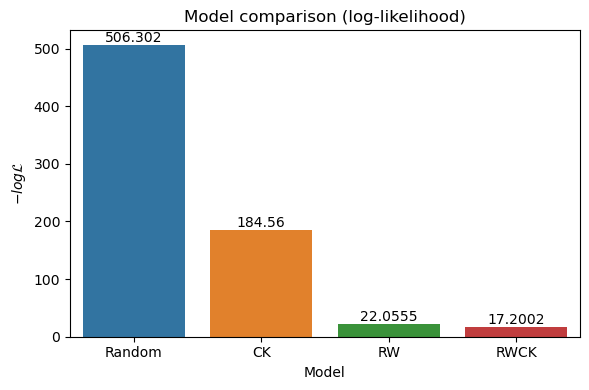

In [73]:
#Plot model comparison
plt.rcParams["figure.figsize"] = [6.00, 4.0]
rel = sns.barplot( data = result_df, x = 'model', y = - result_df[ 'log likelihood' ] )
f = rel.set( title= 'Model comparison (log-likelihood)', xlabel = "Model", ylabel= r'$-log\mathcal{L}$' )
for i in rel.containers:
    rel.bar_label(i,)

It is common to report this figure in article. In particular to show $-log\mathcal{L}$ rather than $log\mathcal{L}$ because $log\mathcal{L}$ is negative. The smaller the better. So, which model best describes the data according to the log likelihood? <font color="orange">RWCK</font>

We can also have a look at the values of the optimized parameters

In [74]:
print( result_df[ [ 'model', 'parameters' ] ] )

    model                                         parameters
0  Random                                    {'THETA': 0.01}
1      CK                        {'A_CK': 0.99, 'B_CK': 2.0}
2      RW                       {'A_RW': 0.38, 'B_RW': 1.53}
3    RWCK  {'A_RW': 0.26, 'B_RW': 1.52, 'A_CK': 0.99, 'B_...


#### 4.6 Model comparison with the BIC score
RWCK best describes the data but... it is also the most "complex" model, ie. the model with the largest number of parameters. Number of parameters per model :
- Random: 1
- CK: 2
- RW: 2
- RWCK: 4

A limitation of the log likelihood is to favor complex models. Let consider an extreme case, a model with 720 parameters, one paremeter for each observation where the parameter value equals to the participant strategy. With the current parameter fitting procedure, the log likelihood would be perfect, $log\mathcal{L} = 0$. Is it a "good" model in term of explaining human behaviour? clearly not. 

The Bayesian Information Criterion (BIC) score addresses this problem, because it is often used to penalize models with many parameters:
$$ BIC = ln(n) * k - 2 * log\mathcal{L}(m) $$

where 
- $n$ is the number of observations to be predicted (here $n=720$), (here the model is used to predict the 720 observations of one participant)
- $k$ is the number of model parameters and
- $\mathcal{L}(m)$ the model log likelihood.

**The BIC score is positive and the closer to zero, the better**.
<div class="alert alert-block alert-success">
<strong> TODO: </strong> Implement the BIC score function
</div>

In [81]:
################################################
# Estimate the BIC Score                       #
# Input:                                       #
#    - n : number of observations to predict   #
#    - k : number of parameters of the model   #
#    - ll: log likelihood                      #
# Ouptput:                                     #
#    -  n * k - 2 ll                           #
################################################
def bic_score( n, k, ll ):
    #########
    # TODO
    return n * k - 2 * ll # Why n instead of log(n) ?
    #########

We can now compare the models according to the BIC Score. We Update the dataframe *result_df* which is the results of parameter fits.

In [82]:
result_df[ 'k' ]  = 0
result_df[ 'BIC'] = 0
result_df[ 'n']   = t_max # number of trials
print( result_df )

for model in model_vec :
    # update k
    result_df.loc[ result_df.model == model.name, 'k' ] = len( model.parameter_names() )
    
    # estimate BIC
    result_df[ 'BIC' ] = round( bic_score( t_max, result_df[ 'k' ], result_df[ 'log likelihood' ] ) )


  participant   model                                         parameters  \
0          10  Random                                    {'THETA': 0.01}   
1          10      CK                        {'A_CK': 0.99, 'B_CK': 2.0}   
2          10      RW                       {'A_RW': 0.38, 'B_RW': 1.53}   
3          10    RWCK  {'A_RW': 0.26, 'B_RW': 1.52, 'A_CK': 0.99, 'B_...   

   log likelihood  k  BIC    n  
0     -506.302212  0    0  720  
1     -184.559895  0    0  720  
2      -22.055537  0    0  720  
3      -17.200160  0    0  720  


We can now visualize the results

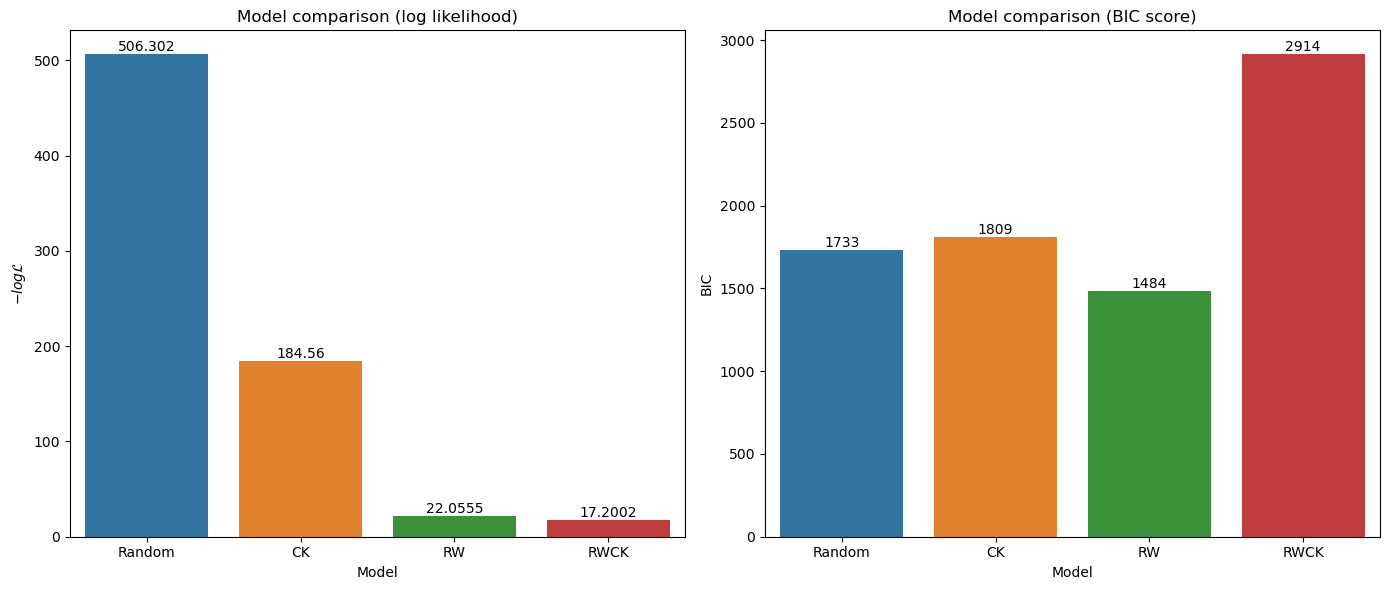

In [83]:
#Plot BIC score comparison
plt.rcParams["figure.figsize"] = [14.00, 6.0]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
rel0 = sns.barplot( data = result_df, x = 'model', y = - result_df[ 'log likelihood' ], ax = axes[0] )
f = rel0.set( title= 'Model comparison (log likelihood)', xlabel = "Model", ylabel= r'$-log\mathcal{L}$' )
for i in rel0.containers:
    rel0.bar_label(i,)

rel1 = sns.barplot( data = result_df, x = 'model', y = result_df[ 'BIC' ], ax = axes[1] )
t = rel1.set( title= 'Model comparison (BIC score)', xlabel = "Model", ylabel= 'BIC' )
for i in rel1.containers:
    rel1.bar_label(i,)
plt.show()

What do you observe? Which is the best model according to the BIC score?


<div class="alert alert-block alert-success">
<strong>TODO: </strong> Let see what's happen for the participant 10. Go back to 4.5 and change participant = 5 to participant = 10. What do you see? Why?
</div>

#### 4.7 BIC score and significance
Can we say that CK is significantly better than RWCK? It is common practice to consider that there is a “strong evidence" in favor of the winning model when the BIC difference is > 6 [Raftery. 1995].


Here, an example how we can report the data:

<!-- style="margin-left:100px;margin-right:100px; ">  -->
<u>According to the results, there are strong evidence (BIC difference > 6) that model A</u> ($log\mathcal{L} = 386.4$, $BIC = 786.0$) <u>outperforms the model B</u> ($log\mathcal{L} = 383.8$, $BIC = 794.0$).


#### 4.8 Individual vs. Population
Until now, we only considered the participant P5 (and P10). The reason is two-fold: (1) start simple, (2) save time as the optimization methods take time. We now consider now a **population** with 5 participants (P2, P4, P5, P10, P11). If it takes too much time, you can use the file "save_result_df.csv" at the next step.


In [84]:
participants = np.array( [2,4,5,10,11] ) # list of 5 participants
t_max        = 720                       # all trials
result_df    = pd.DataFrame([], columns=['participant', 'model', 'k', 'parameter names', 'parameter values', 'log likelihood', 'BIC'] )

for p in participants :
    C  = data.loc[ (data.participant == p) & (data.trial_id < t_max), 'cmd_input' ].to_numpy()
    X  = data.loc[ (data.participant == p) & (data.trial_id < t_max), 'strategy'  ].to_numpy()
    T  = data.loc[ (data.participant == p) & (data.trial_id < t_max), 'time'      ].to_numpy()
    
    print ("====== Participant: ", p , "======" )
    for model in model_vec :
        param_names  = model.parameter_names()
        k            = len( param_names )
        bounds       = model.parameter_bounds()
        
        res = differential_evolution( inv_log_likelihood, bounds = bounds, maxiter=500, args = (param_names, model, X, C, T) )
          
        ll  = - round( res.fun, 1)
        bic = round( bic_score( t_max, k, ll ), 1)
        best_parameters = str( dict( zip(param_names, np.round( res.x, 2 ) ) ) )
        print( model.name, "BIC score:", bic, "log L:", ll )
        print( best_parameters )
        result_df.loc[ len(result_df.index) ] = [ p, model.name, k, ",".join( model.parameter_names() ), best_parameters, ll, bic  ]


====== Participant:  2 ======
Random BIC score: 1818.2 log L: -549.1
{'THETA': 0.73}
CK BIC score: 2043.2 log L: -301.6
{'A_CK': 0.56, 'B_CK': 2.0}
RW BIC score: 1963.4 log L: -261.7
{'A_RW': 0.1, 'B_RW': 0.98}
RWCK BIC score: 3283.0 log L: -201.5
{'A_RW': 0.06, 'B_RW': 0.65, 'A_CK': 0.56, 'B_CK': 2.0}
====== Participant:  4 ======
Random BIC score: 1310.8 log L: -295.4
{'THETA': 0.89}
CK BIC score: 1990.2 log L: -275.1
{'A_CK': 0.58, 'B_CK': 2.0}
RW BIC score: 1787.0 log L: -173.5
{'A_RW': 0.04, 'B_RW': 2.0}
RWCK BIC score: 3184.0 log L: -152.0
{'A_RW': 0.02, 'B_RW': 2.0, 'A_CK': 0.6, 'B_CK': 1.84}
====== Participant:  5 ======
Random BIC score: 1919.6 log L: -599.8
{'THETA': 0.69}
CK BIC score: 2182.6 log L: -371.3
{'A_CK': 0.62, 'B_CK': 2.0}
RW BIC score: 2425.8 log L: -492.9
{'A_RW': 0.06, 'B_RW': 0.61}
RWCK BIC score: 3534.2 log L: -327.1
{'A_RW': 0.02, 'B_RW': 0.44, 'A_CK': 0.65, 'B_CK': 2.0}
====== Participant:  10 ======
Random BIC score: 1732.6 log L: -506.3
{'THETA': 0.01}
CK

You can save / load these resultas (result_df dataframe) to reuse it wiwhout having to relaunch the optimization function 

In [85]:
# save result_df (use your own filename)
result_df.to_csv( './data/saved_result_df.csv' )

# load result_df
#result_df = pd.read_csv( './data/saved_result_df.csv' )

We can now compare models for the whole population

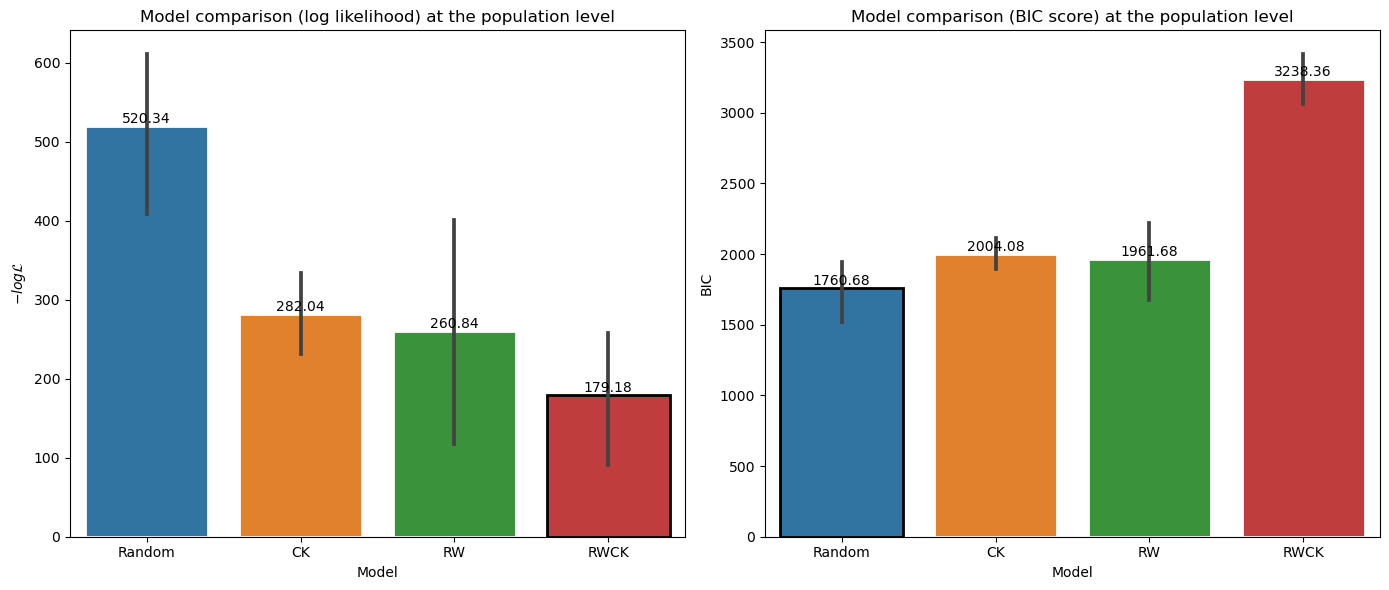

In [86]:
#plot
plt.rcParams["figure.figsize"] = [14.00, 6.0]
plt.rcParams["figure.autolayout"] = True

def display_population_results( result_df ) :
    n_models = len( result_df[ 'model' ].unique() )
    display_df = result_df.copy()
    f, axes = plt.subplots(1, 2)
    order = ['Random', 'CK', 'RW', 'RWCK' ]
    model_df = display_df.groupby(['model']).mean()
    model_df = model_df.reset_index()
    model_df['model'] = pd.Categorical(model_df['model'], order )
    model_df = model_df.sort_values( 'model' )
    
    #edge color
    edges_ll = np.array( ['white'] * len( model_df[ 'model' ] ) ) 
    edges_ll[ np.argmax( model_df[ 'log likelihood' ] ) ] = 'black'
    
    rel0 = sns.barplot( data = display_df, x = 'model', y = - np.round( display_df[ 'log likelihood' ], 1), order = order, edgecolor = edges_ll, linewidth = 2,ax = axes[0] )
    
    f = rel0.set( title= 'Model comparison (log likelihood) at the population level', xlabel = "Model", ylabel= r'$-log\mathcal{L}$' )
    for i in rel0.containers:
        rel0.bar_label(i,)
    
    #edge color
    edges_BIC = np.array( ['white'] * len( model_df[ 'model' ] ) ) 
    edges_BIC[ np.argmin( model_df[ 'BIC' ] ) ] = 'black'
    rel1 = sns.barplot( data = display_df, x = 'model', y = np.round(display_df[ 'BIC' ], 1), order = order, edgecolor = edges_BIC, linewidth = 2, ax = axes[1] )
    t = rel1.set( title= 'Model comparison (BIC score) at the population level', xlabel = "Model", ylabel= 'BIC' )
    for i in rel1.containers:
        rel1.bar_label(i,)
    plt.show()

display_population_results( result_df )



The figure compares the four models in term of $log\mathcal{L}$ (left) and BIC score (right) for the whole population. The lower the better. The black outline indicates the winning model. 

<div class="alert alert-block alert-success">
Which is the winning model for the whole <strong>population</strong>?
    
Do we have the same results for each participant / <strong>individual</strong>?
</div>

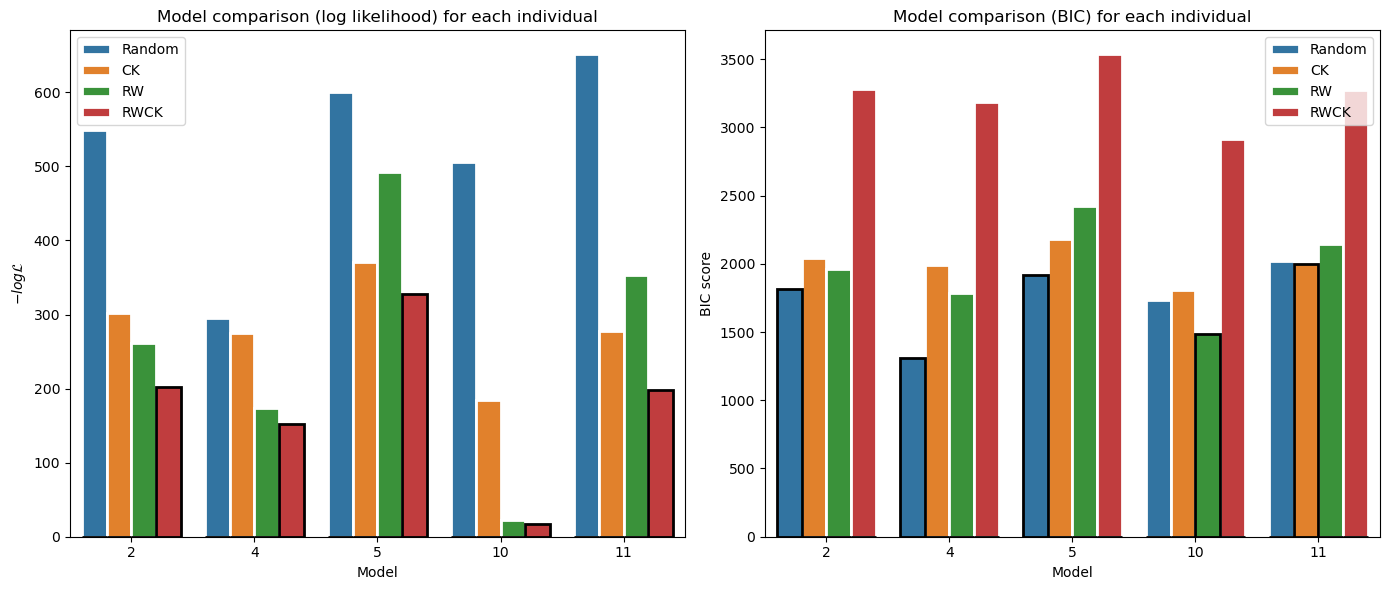

In [87]:

def display_individual_results( result_df ) :
    n_models = len( result_df[ 'model' ].unique() )
    display_df = result_df.copy()
    f, axes = plt.subplots(1, 2)
    
    display_df[ 'max_ll_tmp'  ]  = display_df.groupby(['participant'])['log likelihood'].transform(max)
    display_df[ 'max_ll' ]  = 0
    # - log likelyhood for the winning model, 0 otherwise
    display_df.loc[ display_df[ 'log likelihood' ] == display_df[ 'max_ll_tmp' ], 'max_ll' ] = - display_df[ 'max_ll_tmp'  ]

    #draw likelihood for all models
    rel0 = sns.barplot( data = display_df, x = 'participant', y = - display_df[ 'log likelihood' ], hue="model", edgecolor = 'white', linewidth = 2, ax = axes[0] )
    #draw likelihood for the winning model
    sns.barplot(        data = display_df, x = 'participant', y = 'max_ll', hue= "model", edgecolor = 'black', linewidth = 2, ax = axes[0] )

    #title, labels and legend
    f = rel0.set( title= 'Model comparison (log likelihood) for each individual', xlabel = "Model", ylabel= r'$-log\mathcal{L}$' )
    h, l = axes[0].get_legend_handles_labels()
    axes[0].legend(h[0:n_models], l[0:n_models])
    
    
    display_df['min_BIC_tmp'] = display_df.groupby(['participant'])['BIC'].transform(min)
    display_df[ 'min_BIC' ]  = 0
    # bic for the winning model, 0 otherwise
    display_df.loc[ display_df[ 'BIC' ] == display_df[ 'min_BIC_tmp' ], 'min_BIC' ] = display_df[ 'min_BIC_tmp'  ]
    
    #draw BIC for all models
    rel0 = sns.barplot( data = display_df, x = 'participant', y = display_df[ 'BIC' ], hue="model", edgecolor = 'white', linewidth = 2, ax = axes[1] )
    #draw BIC for the winning model
    sns.barplot(        data = display_df, x = 'participant', y = 'min_BIC', hue= "model", edgecolor = 'black', linewidth = 2, ax = axes[1] )

    #title, labels and legend
    f = rel0.set( title= 'Model comparison (BIC) for each individual', xlabel = "Model", ylabel= 'BIC score' )
    h, l = axes[1].get_legend_handles_labels()
    axes[1].legend(h[0:n_models], l[0:n_models])

display_individual_results( result_df )   


Comparing models for each individual reveals another story. There is no a single model for all participants.

Two different individuals can have different strategies and thus behaviors. One model can better describes one strategy / behavior while another model can better describes another strategy / behavior. Here, for instance, P10 never learned or used shortcut. A simple biased random model is sufficient to describe this behavior.


#### 4.9 Summary and reporting results
In your article, it is good practice to include the two last figures ($log\mathcal{L}$ and BIC both at the population and individual level) as well as the following table (latex code generated) summarizing the results.

In [98]:
##################################
##################################
def model_comparison_table( result_df) :
    ll = '- log L'
    order    = ['Random', 'CK', 'RW', 'RWCK' ]
    model_df = result_df.groupby(['model', 'parameter names', 'k']).mean()
    model_df = model_df.reset_index()
    model_df['model'] = pd.Categorical(model_df['model'], order )
    model_df = model_df.sort_values( 'model' )
    # model_df[ 'participant' ] = model_df[ 'participant' ].astype(int)
    # model_df[ 'k' ] = model_df[ 'k' ].astype(int)
    model_df.rename(columns={'log likelihood': ll, 'parameter names':'parameters' }, inplace=True)
    model_df[ ll ] = - np.round( model_df[ ll ] , 1 )
    model_df[ 'BIC' ] = np.round( model_df[ 'BIC' ] , 1 )

    table = model_df[ ['model', 'k', 'parameters', ll , 'BIC' ] ]
    
    print( "--------------------------------------------------------------------------" )
    print( table.to_string(index=False) )
    print( "--------------------------------------------------------------------------" )

    print( table.to_latex() )

model_comparison_table( result_df )

--------------------------------------------------------------------------
 model  k          parameters  - log L    BIC
Random  1               THETA    520.3 1760.7
    CK  2           A_CK,B_CK    282.0 2004.1
    RW  2           A_RW,B_RW    260.8 1961.7
  RWCK  4 A_RW,B_RW,A_CK,B_CK    179.2 3238.4
--------------------------------------------------------------------------
\begin{tabular}{llrlrr}
\toprule
{} &   model &  k &           parameters &  - log L &     BIC \\
\midrule
3 &  Random &  1 &                THETA &    520.3 &  1760.7 \\
0 &      CK &  2 &            A\_CK,B\_CK &    282.0 &  2004.1 \\
1 &      RW &  2 &            A\_RW,B\_RW &    260.8 &  1961.7 \\
2 &    RWCK &  4 &  A\_RW,B\_RW,A\_CK,B\_CK &    179.2 &  3238.4 \\
\bottomrule
\end{tabular}



# Part 5: Model Simulation (30mn)

Now that we have the best set of parameters for each model, we can simulate them. In some cases, model simulation can lead to very different results from model fitting if the path of actions sampled by the participant is widely different from the paths likely to be selected by the model. <strong> It is thus important to also simulate the models </strong> and verify that they do reproduce the main behavioral properties of the participants (wilson and Collins). In our context, it can be the evolution of the percentage of correct shortcut execution, which is commonly used to compare interaction techniques favoring shortcuts, i.e. how well the models can reproduce the first figure of the exercice. 


<ol>
<li> Simulation preparation </li>
<li> Simulation implementation</li>
<li>  Simulation visualization </li>
<li> Mean Square error (MSE) </li>
<li> Conclusion </li>
</ol>

#### 5.1 Simulation preparation
The results of our simulation are saved in a dataframe similar to the one containing the empirical data of the participant, except that it requires an additional column indicating the id of the simulation


In [99]:
participants = np.array( [2,4,5,11] ) # list of 5 participants
all_df = pd.read_csv( './data/audio_hotkey.csv' )
all_df = all_df[ all_df[ 'participant' ].isin( participants ) ]
all_df[ 'sim id' ]   = 0

To run a simulation, the model should generate at each time step: 
- an action,
- its duration. To simplify, we assume execution time only depends on the strategy: $T_{Menu} = 2.0$, $T_{SHORTCUT}= 0.9$, $T_{LEARNING} = 3.8$.
- whether the user executed the righ command. To simplify, we assume no error.


In [104]:

####################
def time( model, action) : 
    t = np.array( [2.0, 0.9, 3.8] ) # model and history independent
    return t[ action ]
    
####################    
def success_probability( model, action ) :
    return 1.0                      # no error


#### Util
In section 4, the results of the parameter fits procedure was saved in the dataframe **result_df** (see above). Here a function to assign the best parameter value to a model from this data frame. The best parameter depends on the participant. This function is necessary when running simulations

In [106]:
result_df

,participant,model,k,parameter names,parameter values,log likelihood,BIC
0,2,Random,1,THETA,{'THETA': 0.73},-549.1,1818.2
1,2,CK,2,"A_CK,B_CK","{'A_CK': 0.56, 'B_CK': 2.0}",-301.6,2043.2
2,2,RW,2,"A_RW,B_RW","{'A_RW': 0.1, 'B_RW': 0.98}",-261.7,1963.4
3,2,RWCK,4,"A_RW,B_RW,A_CK,B_CK","{'A_RW': 0.06, 'B_RW': 0.65, 'A_CK': 0.56, 'B_...",-201.5,3283.0
4,4,Random,1,THETA,{'THETA': 0.89},-295.4,1310.8
5,4,CK,2,"A_CK,B_CK","{'A_CK': 0.58, 'B_CK': 2.0}",-275.1,1990.2
6,4,RW,2,"A_RW,B_RW","{'A_RW': 0.04, 'B_RW': 2.0}",-173.5,1787.0
7,4,RWCK,4,"A_RW,B_RW,A_CK,B_CK","{'A_RW': 0.02, 'B_RW': 2.0, 'A_CK': 0.6, 'B_CK...",-152.0,3184.0
8,5,Random,1,THETA,{'THETA': 0.69},-599.8,1919.6
9,5,CK,2,"A_CK,B_CK","{'A_CK': 0.62, 'B_CK': 2.0}",-371.3,2182.6


In [107]:
####################
# assign the best parameters for a given participant to the model 
# based on the results of the parameter fits procedure (saved in result_df)
# - model      : an instance of the Model class
# - participant: participant id
# - fit_results:  a dataframe with a at least three columns: 
#                 - 'name' (name of the model), 
#                 - 'participant' (participant id), 
#                 - 'parameter values' (dict containing the best parameter values) 
def set_best_parameters( model, participant, fit_results ) :
    parameter_str = fit_results.loc[ ( fit_results[ 'model' ] == model.name ) & (fit_results[ 'participant' ] == participant ), 'parameter values' ].to_numpy()[0]
    model.parameter = eval( parameter_str )
    

#### 5.2 Simulation implementation
Each participant has a different behavior. So, for each model, we ran k simulations per participant using individual parameters. 

Considering 4 models (Random, CK, RW and RWCK), 5 participants and k = 3 simulations per participant / model, we have to run already 60 simulations. Note that k=3 is a small number, I used 50 simulations in my project.
<div class="alert alert-block alert-success">
<strong>TODO: </strong> implement the function <i>simulate()</i>. You should use the methods <i>action_probability</i> and <i>update</i> from the class Model as well as the method <i>random.choice</i> from numpy.
</div>

In [116]:
np.set_printoptions( threshold = sys.maxsize )
actions = np.array([Action.MENU, Action.SHORTCUT, Action.LEARNING] )
penalty = 3.0 #The study includes a 3s penalty when an error occurs

#####################
# For each participant and each model, run k simulations
# INPUTS
#   model_vec       : list of the models to simulate
#   all_df          : empirical data containing in particular the sequence of commmands for each participant
#   fitting_results : dataframe containing the set of best parameters for each model and individual
#   repetition      : number of simulations per model and participants
# OUTPUT
#   simulation_df   : dataframe extending all_df with all simulations
#####################
def simulate_all( model_vec, all_df, fitting_results, repetition ) :
    simulation_vec = []                                # contain results of the simulations
    participant_vec = all_df[ 'participant' ].unique() #list of the participants
    print( participant_vec )
    
    for i in range(0, repetition) :
        print( "simulation", i+1 , "/", repetition)
        
        for model in model_vec :
            
            for p in participant_vec :
                
                model.reset()

                # select the best set of parameters of the participant p
                set_best_parameters( model, p, fitting_results )

                # select the sequence of commands of the participant p
                command_vec = all_df.loc[ all_df.participant == p, 'cmd_input' ].to_numpy()

                # run one simulation on the sequence of commands of participant p
                strategy_vec, time_vec, success_vec = simulate( model, command_vec )

                # create a datframe with the same format than the one of empirical data, but with
                # the generated data
                res_df = all_df.copy() 
                res_df = res_df[ res_df.participant == p ]                
                res_df = res_df.assign( simulation = i, model = model.name, strategy = strategy_vec, time = time_vec, success = success_vec )
                simulation_vec.append( res_df ) 
    
    return pd.concat( simulation_vec )

#####################
# For each command, return an action, time and success
# INPUTS
#   model   : list of the models to simulate
#   C       : sequence of commands
# OUTPUT
#   [X,T,S] : array containing the sequences of (1) actions, (2) time and (3) success
#####################
def simulate( model, C ): 
     
    X = np.array( [], dtype = int)   # sequence of action
    T = np.array( [], dtype = float) # sequence of time
    S = np.array( [], dtype = int )  # sequence of success 

    for command in C :

        ####################
        # TODO
        action_prob = model.action_probability( model.parameter, command )
        action = np.random.choice( actions, 1, p = action_prob )
        t = time( model, action )
        success_prob = success_probability( model, action )
        success = np.random.choice( [0,1], p = [1 - success_prob, success_prob] )
        
        model.update( model.parameter, action, command, t)
        # t = ...
        # success = ...
        ####################

        X = np.append( X, action)
        T = np.append( T, t)
        S = np.append( S, success)
        
    return [ X, T, S ]

######################
# run the simulation #
######################
simulation_df = simulate_all( model_vec, all_df, result_df, 7 )
print( "simulations...finished" )
    

[ 2  4  5 11]
simulation 1 / 7


simulation 2 / 7
simulation 3 / 7
simulation 4 / 7
simulation 5 / 7
simulation 6 / 7
simulation 7 / 7
simulations...finished


#### 5.3 Simulation visualization
You can now visualize the results of the simulations

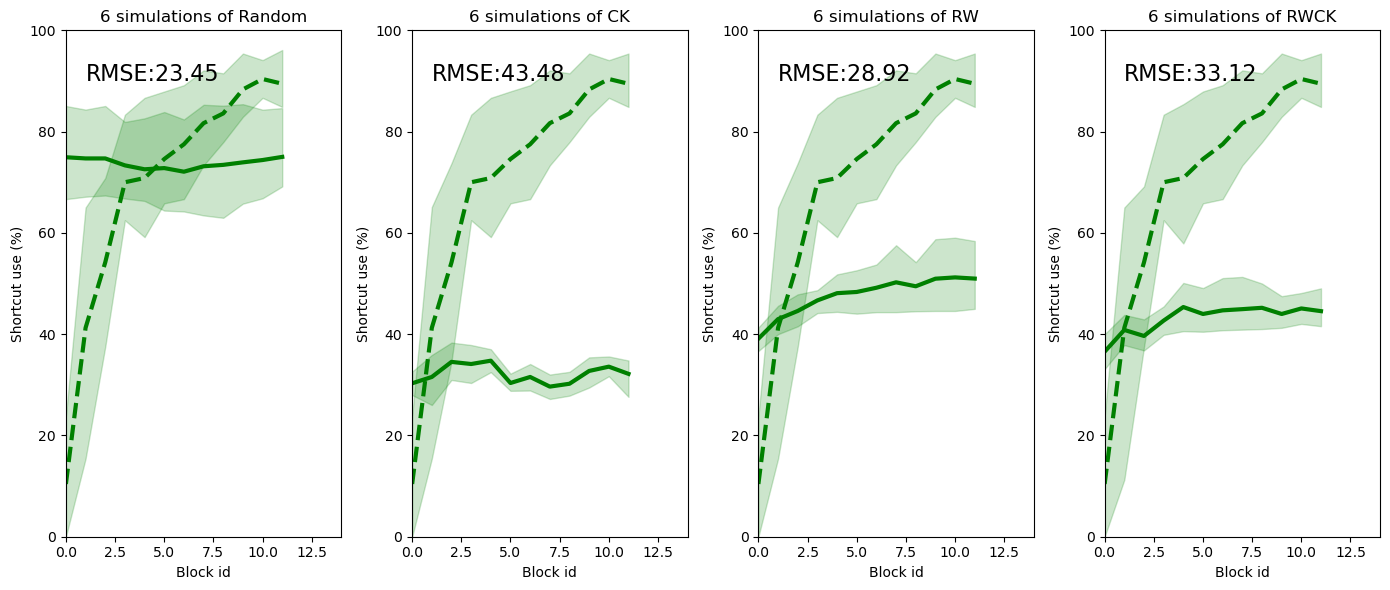

In [118]:
#from sklearn.metrics import mean_squared_error
#import math

#######################################
def distance_str(y_observation, y_prediction ):
    ############
    # TODO
    return 'RMSE:' + str( round(np.sqrt( mean_squared_error( y_observation, y_prediction ) ), 2) )
    # return ""
    ############

######################################
def display_simulations( all_df, _simulation_df ) :
    simulation_df = _simulation_df.copy()
    simulation_df[ 'correct_hotkey'] = 0
    simulation_df.loc[ ( simulation_df[ 'success'] == 1) & (simulation_df[ 'strategy' ] == 1), 'correct_hotkey' ] = 100
    model_vec     = simulation_df[ 'model' ].unique()
    n_simulations = simulation_df[ 'simulation' ].max()

    # agregate observed data per block and participant for visualisation
    observation_df = all_df.copy()
    observation_df[ 'correct_hotkey' ] = 0
    observation_df.loc[ ( observation_df[ 'success'] == 1) & (observation_df[ 'strategy' ] == 1), 'correct_hotkey' ] = 100
    observation_df = observation_df.groupby( [ 'block_id' , 'participant' ] ).mean( 'correct_hotkey' ).reset_index()
    
    #agregate observed data per block for estimating MSE
    y_observation = observation_df.groupby( ['block_id' ] ).mean( 'correct_hotkey' ).reset_index()[ 'correct_hotkey' ].to_numpy()
    #print( "observation: ", y_observation)
    
    f, axes = plt.subplots(1, len( model_vec) )    
    for i in range( 0, len( model_vec) ) :
        model_df = simulation_df.copy()
        model_df = model_df[ model_df.model == model_vec[i] ]
        #print( model_df )
        model_df = model_df.groupby( [ 'block_id' , 'participant' ] ).mean( 'correct_hotkey' ).reset_index()
        #print( model_df )
        y_prediction = model_df.groupby( [ 'block_id' ] ).mean( 'correct_hotkey' ).reset_index()[ 'correct_hotkey' ].to_numpy() 
        #print( "prediction: ", y_prediction)
        
        rel  = sns.lineplot( data = model_df        , x = 'block_id', y = 'correct_hotkey', linewidth = 3, color = "green", ax = axes[i] )
        rel2 = sns.lineplot( data = observation_df  , x = 'block_id', y = 'correct_hotkey', linewidth = 3, color = "green", ax = axes[i], linestyle='--' )
        axes[i].text(1, 90, distance_str(y_observation, y_prediction) , fontsize=16)
        info = rel.set( title= str( n_simulations ) + ' simulations of ' + model_vec[ i ], xlabel = "Block id", ylabel= "Shortcut use (%)", ylim = [0,100], xlim=[0,14] )

display_simulations( all_df, simulation_df )

The figure above shows the shortcut use (%) per block for each model. Observed participants’ data are represented with dots. Synthetised data (solid line) are produced by aggregating n simulations per participant with individual parameters (ie. ther results of your simulations).

The results are interesting beacuse they show a different picture. While model fit results indicated that Random and CK model better accounts for the empirical data, the <strong>visual inspection</strong> of simulation results suggest that only RW better synthetizes users’ behavioral data (in term of increasing of shortcut use).

To complete visual inspection, we can use RMSE to quantify how closely model simulations reflects participants behavior.

#### 5.4 Root Mean Square Error (RMSE)
Multiple metrics (MAE, MSE, RMSE, R2) are available to evaluate the performance of the model in regression analysis ( 
https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e)

In this exercice, we will use the Root Mean Square Error (RMSE) because: 
- It penalizes the large prediction errors
- It is widely used
- It has the same units as the dependent variable (Y-axis).

RMSE is the square root of value obtained from Mean Square Error (MSE) function. MSE is the average squared difference between the estimated values (prediction) and the actual value (observation):

$$ RMSE = \sqrt{MSE} = \sqrt{ \frac{1}{n} \sum_1^n (y_i^{pred} - {y_i^{obs}})^2 }$$

where 
- $n$ is the number of predictions / observations
-  $\{y_0^{obs}, ..., y_n^{obs} \}$, the vector of observed values
-  $\{y_0^{pred}, ..., y_n^{pred} \}$, the vector of predicted values

The lower value of RMSE, the better it is.

<div class="alert alert-block alert-success">
<strong>TODO:</strong> update the <i>distance_str()</i> function above to compute RMSE. You can do it manually or use the method <i>mean_square_error</i> from scipy. Visualize the data.
</div>

#### 5.5 Conclusion

In conclusion, these results
- <u>highlight the importance of combining model fitting and model simulation to validate HCI models as they show a different picture.</u>
- highlight the iportance of studying model fit at the population level as well as the individual level 
- suggest that this first set of classical models are **not satisfactory** as they tend to overestimate initial shortcut use and underestimate the final shortcut use. This motivates us to elaborate a dedicated model of shortcut adoption [Bailly et al. 2023].


# Part 6: Step-by-step model evaluation (30mn)
In this part, we explain the step-by-step process to design and evaluate HCI models. It is again based on the article of Wilson and Collins. The process is illustrated in the figure below (extracted from their article).

<center><img src="images/pipeline.png" width="700"/></center> 

<center><strong>Figure 7:</strong> Adapted fron Wilson and Collins. Process for using computional modeling to better understand behavior. </center> 

<p style="background-color:lightgreen;">
In the previous parts, we mainly focused on the green box:</p>
<ul > 
    <li>fit real data</li>
<li>parameter fits</li>
<li>model comparison</li>
<li>validate the model (simulate the model with the best parameters)</li>
</ul>
</p>

The objective is:
- to quickly discuss the other cells
- and to focus on parameter recovery and model recovery

<p style="background-color:lightpink;">-</p>

#### 6.1 Design experiment

Computational modeling does not replace good experimental design. When building a model, you should design the experiment <strong>at the same time</strong>. You should ask yourself the following questions to optimize your experimental design (and your model):
<ul > 
<li>What scientific question are you asking?</li>
<li>Does your experiment engage the targeted processes?</li>
<li>Will signatures of the targeted processes be evident from simple statitics of the data?</li>
</ul>

One key message here is that the experiment should be designed before or at the same time as the model, not after!


<p style="background-color:lightpink;">-</p>

#### 6.2 Build models

Recommendations are :
<ul> 
<li>A computation model should be as simple as possible, bu no simpler</li>
<li>A computaional model should be interpretable</li>
<li>The models should capture all the hypotheses you plan to test</li>
</ul>
</p>
<p style="background-color:#F5CBA7;">- </p>

#### 6.3 Simulate, simulate, simulate

Previously we simulated the model(s) <strong>after</strong> having collected empirical data and fitted the parameters. It is also very important to simulate the models <strong>before</strong> collecting empirical data, ie. to create fake, or surrogate data. Indeed, you should use the models to simulate the behavior of participants in the experiment, and to observe how behavior changes with different models, different model parameters, and different variants of the experiment. 

This step will allow you to refine the first two steps (6.1 and 6.2): confirming that the experimental design elicits the behaviors assumed to be captured by the computational model. To do this, here are some important steps.

<ul > 
<li>Define model-independent measures that capture key aspects of the processes you are trying to model. In our case, it would have been the evolution of shortcut use</li>
<li>Simulate the model across the range of parameter values</li>
<li>Visualize the simulated behavior of different models.</li>
</ul>

For instance, imagine that we did **not** collect empirical data. We could still have some assumptions regarding the evolution of shortcut use, ie. shortcut use increases with practice. We can then simulate the models with different "plausible" sets of parameters and check whether the generated behaviors are plausible.

<div class="alert alert-block alert-success">
<strong>TODO: </strong> To save time, we only simulate the Random model with different values of the parameter $\theta$.
</div>


In [120]:

#####################
# model              : model to simulate
# parameter_set_list : list containing different parameter sets for model 
# C                  : sequence of commands
# block_id           : block ids (used to aggregate data)
#####################
def simulation_preview( model, parameter_set_list, C, block_id, repetition ) :
    simulation_vec = []
    
    for i in range( 0, repetition ) :
        print( "simulation", i+1 , "/", repetition)
            
        for parameter_set in parameter_set_list :
            model.reset()
            model.parameter = parameter_set

            # simulate the model
            X, T, S = simulate( model, C )

            # save simulation results
            data = {'model'     : model.name,
                    'parameters': str( parameter_set ) ,
                    'cmd_input' : C, 'block_id' : block_id,
                    'strategy'  : X, 'time' : T, 'success': S } 
            simulation_vec.append( pd.DataFrame( data ) ) 
    
    return pd.concat( simulation_vec )


#####################
# return list of parameter sets
#####################
def parameter_sets( parameter_names, parameter_values, res_vec, index = 0, current = dict() ):
    if index == len( parameter_names ) :
        res_vec.append( current.copy() )
        return res_vec

    name   = parameter_names [ index ] 
    print( name )
    values = parameter_values[ index ]
    for value in values :
        current[ name ] = value
        res_vec = parameter_sets( parameter_names, parameter_values, res_vec, index + 1, current )
   
    return res_vec

####################
####################

# get the sequence of commands (and blocks) of the participant 5
C            = all_df.loc[ all_df.participant == 5, 'cmd_input' ].to_numpy()
block_id     = all_df.loc[ all_df.participant == 5, 'block_id'  ].to_numpy()
Random_model = model_vec[ 0 ]

# create the list of parameters to test
parameter_set_list = []
parameter_names = [ 'THETA' ]
parameter_values = [ [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] ]
parameter_set_list = parameter_sets( parameter_names, parameter_values, parameter_set_list )
print( parameter_set_list )

THETA
[{'THETA': 0.1}, {'THETA': 0.2}, {'THETA': 0.3}, {'THETA': 0.4}, {'THETA': 0.5}, {'THETA': 0.6}, {'THETA': 0.7}, {'THETA': 0.8}, {'THETA': 0.9}]


In [121]:

# simulate the random model with four different values of theta: parameter_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# TODO
rand_model_simulation = simulation_preview( Random_model, parameter_set_list, 
                                          C = C, block_id = block_id, 
                                          repetition = 5 )
print( "simulation previews finished" )

simulation 1 / 5
simulation 2 / 5
simulation 3 / 5
simulation 4 / 5
simulation 5 / 5
simulation previews finished


We can now visualize the results of our simulations

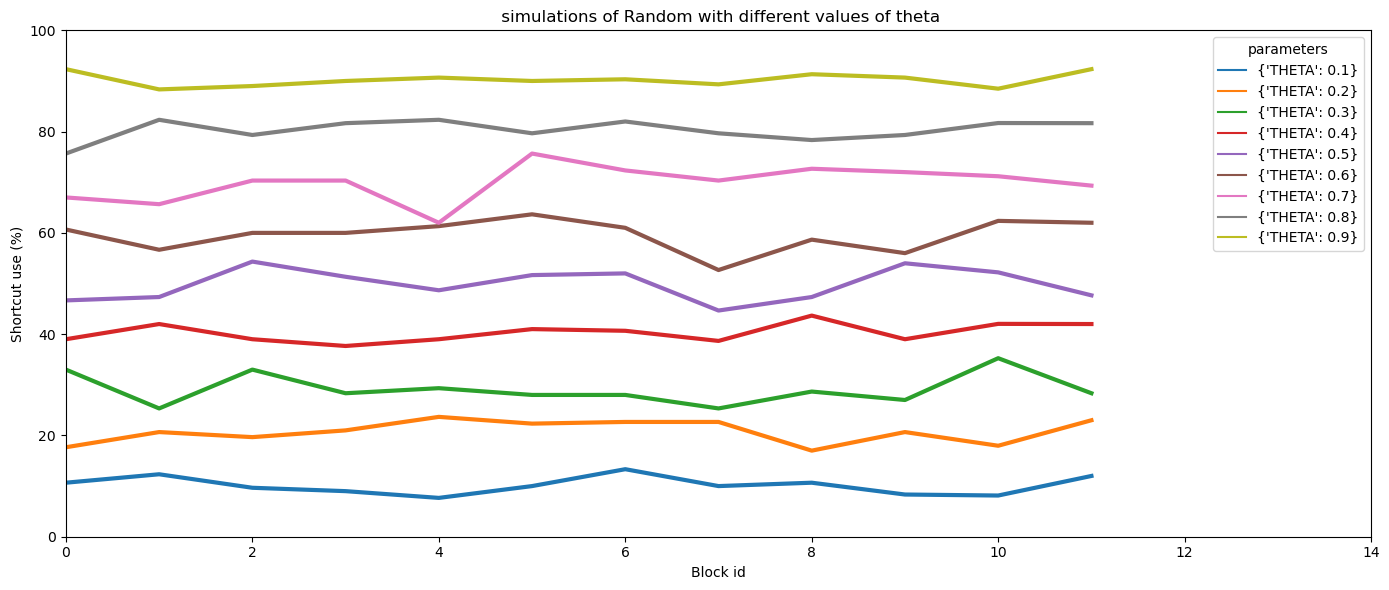

In [122]:
######################################
def display_simulations( _simulation_df ) :
    simulation_df = _simulation_df.copy()
    simulation_df[ 'correct_hotkey'] = 0
    simulation_df.loc[ ( simulation_df.success == 1 ) & ( simulation_df.strategy == 1 ), 'correct_hotkey' ] = 100
    simulation_df = simulation_df.groupby( [ 'block_id' , 'parameters' ] ).mean( 'correct_hotkey' ).reset_index()
    rel  = sns.lineplot( data = simulation_df, x = 'block_id', y = 'correct_hotkey', hue='parameters', linewidth = 3 )
    info = rel.set( title= ' simulations of Random with different values of theta', xlabel = "Block id", ylabel= "Shortcut use (%)", ylim = [0,100], xlim=[0,14] )

display_simulations( rand_model_simulation )



It appears clearly at this stage **this model is not sufficient to explain and predict shortcut adoption**. So, no need to collect data and fit parameters for this model. Instead you should consider another model-independent measures, experiment design and more likely another model...


#### 6.4 Parameter recovery
This step is often neglected in HCI. Before reading too much into the best fitting parameter values, it is important to check <u>whether the fitting procedure gives meaningful parameter values in the best case scenario</u>. otherwise, it is likely that you have a problem somewhere. The process is explained below. It consists of simulating the model with ''arbitrary parameters'' and to check wether the parameter fit procedure on the simulated data estimate the same parameter values.

<center><img src="images/parameter_recovery.png" width="900"/></center> 

<center><strong>Figure 8:</strong> Parameter recovery </center> 

<div class="alert alert-block alert-success">
<strong>TODO:</strong> test whether you can recover parameters for the RW model </strong>
</div>



In [125]:

#####################
# The function returns a random valid set of parameters for the model 'model'
def random_parameter_set( model ) :
    res = dict()
    names  = model.parameter_names()
    bounds = model.parameter_bounds()
    for i in range( 0, len( names ) ) :
        res[ names[i] ] = round( random.uniform( bounds[i][0], bounds[i][1] ), 2 )
    return res

                             
#####################
# model      : model
# parameter_set_list : list containing the set of parameter of model
# C          : sequence of commands (command_vec)
# block_id   : 
# repetition : nb of simulation per parameter set
#####################
def parameter_recovery( model, C, block_id, repetition ) :
    simulation_vec = []
    
    for i in range(0, repetition) :
            
        model.reset()

        ###############
        # TODO
        model.parameter = random_parameter_set( model )
        # ... = simulate( ... )
        X_sim, T_sim, S_sim = simulate( model, C )
        ###############
        

        # parameter fit
        param_names = model.parameter_names()
        bounds      = model.parameter_bounds()

        ###############
        # TODO
        res = differential_evolution( inv_log_likelihood, 
                                      bounds = bounds,
                                        args = ( param_names, model, X_sim, C, T_sim ) )
        ###############
        
        
        fit_parameter_set = dict( zip(param_names, np.round( res.x, 1 ) ) )
        print( "sim", i+1 , "/", repetition, '\t', model.parameter, fit_parameter_set)
            
        #output
        data = {'model'     : model.name, 
                'simulated parameters': str( model.parameter ),
                'fit parameters': str( fit_parameter_set ),
                'simulation': i }
        for name in model.parameter.keys() :
            data[ name ] = model.parameter[ name ]
            data[ name + '_r' ] = fit_parameter_set[ name ]

        simulation_vec.append( pd.DataFrame( data, index=[0] ) )

    return pd.concat( simulation_vec )


################
################
model = model_vec[ 2 ] # RW model
parameter_recovery_df = parameter_recovery( model, C, block_id, 40)
parameter_recovery_df.to_csv( './data/parameter_recovery.csv' )
print( "finished" )


sim 1 / 40 	 {'A_RW': 0.12, 'B_RW': 0.41} {'A_RW': 0.1, 'B_RW': 0.4}
sim 2 / 40 	 {'A_RW': 0.37, 'B_RW': 0.15} {'A_RW': 0.4, 'B_RW': 0.1}
sim 3 / 40 	 {'A_RW': 0.65, 'B_RW': 1.59} {'A_RW': 1.0, 'B_RW': 2.0}
sim 4 / 40 	 {'A_RW': 0.98, 'B_RW': 0.65} {'A_RW': 1.0, 'B_RW': 0.8}
sim 5 / 40 	 {'A_RW': 0.54, 'B_RW': 1.13} {'A_RW': 1.0, 'B_RW': 2.0}
sim 6 / 40 	 {'A_RW': 0.94, 'B_RW': 0.09} {'A_RW': 0.9, 'B_RW': 0.1}
sim 7 / 40 	 {'A_RW': 0.09, 'B_RW': 1.14} {'A_RW': 0.1, 'B_RW': 1.4}
sim 8 / 40 	 {'A_RW': 0.34, 'B_RW': 0.71} {'A_RW': 0.5, 'B_RW': 0.8}
sim 9 / 40 	 {'A_RW': 0.41, 'B_RW': 0.97} {'A_RW': 0.4, 'B_RW': 1.0}
sim 10 / 40 	 {'A_RW': 0.22, 'B_RW': 1.79} {'A_RW': 0.2, 'B_RW': 2.0}
sim 11 / 40 	 {'A_RW': 0.32, 'B_RW': 0.17} {'A_RW': 0.2, 'B_RW': 0.2}
sim 12 / 40 	 {'A_RW': 0.59, 'B_RW': 0.77} {'A_RW': 0.7, 'B_RW': 1.1}
sim 13 / 40 	 {'A_RW': 0.6, 'B_RW': 1.61} {'A_RW': 1.0, 'B_RW': 2.0}
sim 14 / 40 	 {'A_RW': 0.86, 'B_RW': 1.13} {'A_RW': 1.0, 'B_RW': 1.1}
sim 15 / 40 	 {'A_RW': 0.56, '

We can now visualize the results of the parameter recovery

[0.12 0.37 0.65 0.98 0.54 0.94 0.09 0.34 0.41 0.22 0.32 0.59 0.6  0.86
 0.56 0.74 0.79 0.43 0.77 0.71 0.58 0.11 0.61 0.42 0.46 0.31 0.16 0.02
 0.91 0.87 0.48 0.27 0.17 0.89 0.13]
[0.41 0.15 1.59 0.65 1.13 0.09 1.14 0.71 0.97 1.79 0.17 0.77 1.61 0.92
 1.46 1.43 1.26 0.61 1.54 0.52 1.34 1.55 0.66 1.3  1.49 0.22 0.38 1.35
 0.24 1.28 1.57 1.21 0.37 0.69 1.05 1.09]


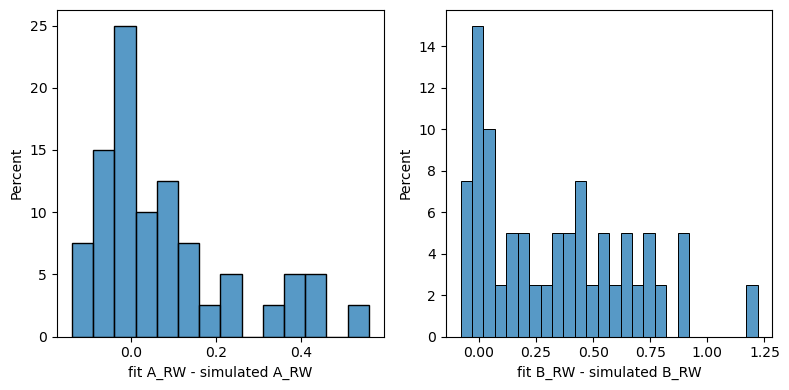

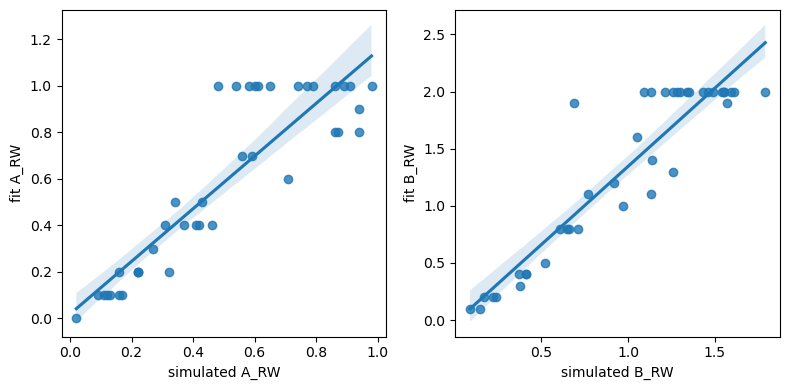

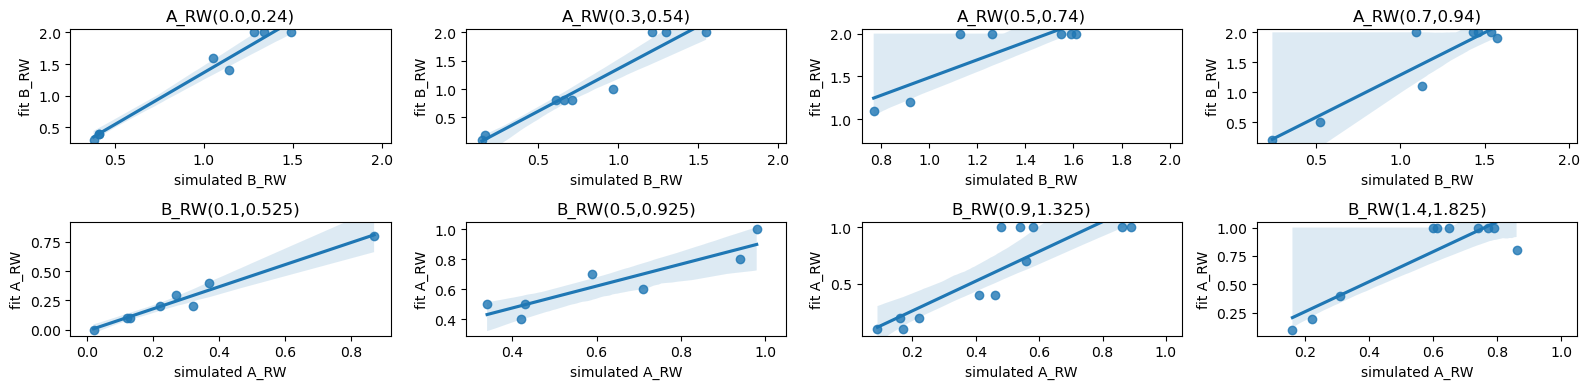

In [126]:
######################################
# recovery_df  : dataframe with (at least) four columns
# parameter_names  : array containing the name of the parameters
# Note, for each parameter p, there is a column 'p' and 'p_r'
#############################################
def plot_parameter_recovery_distribution( recovery_df, parameter_names ) :
    f, axes = plt.subplots( 1, len( parameter_names) )
    df = recovery_df.copy()
    df = df.reset_index()
    for i, name in enumerate( parameter_names ) : 
         df [ name + '_diff' ] = df[ name + '_r' ] - df[ name ]
         #print( df )
         rel  = sns.histplot( data = df, x = name + '_diff', binwidth=0.05, stat='percent',  ax= axes[ i ]  )
         info = rel.set( xlabel = 'fit ' + name + ' - simulated ' + name )

######################################
# recovery_df  : dataframe with (at least) four columns
# parameter_names  : array containing the name of the parameters
# Note, for each parameter p, there is a column 'p' and 'p_r'
#############################################
def plot_parameter_recovery_fit( recovery_df, parameter_names ) :
    f, axes = plt.subplots( 1, len( parameter_names) )
    df = recovery_df.copy()
    df = df.reset_index()
    for i, name in enumerate( parameter_names ) : 
         df [ name + '_diff' ] = df[ name + '_r' ] - df[ name ]
         #print( df )
         rel  = sns.regplot( data = df, x = name, y = name + '_r', ax= axes[ i ]  )
         info = rel.set( xlabel = 'simulated ' + name, ylabel = 'fit ' + name )



######################################
# recovery_df  : dataframe with (at least) four columns
# parameter_names  : array containing the name of the parameters len( param_names ) ==2
# This function only works for models with two parameters.
#############################################
def plot_parameter_recovery_fit_bis(recovery_df, parameter_names) :
    bins = 4
    print( recovery_df[ parameter_names[0] ].unique() )
    print( recovery_df[ parameter_names[1] ].unique() ) 
    #unique_values = np.array( [ recovery_df[ parameter_names[0] ].unique(), recovery_df[ parameter_names[1] ].unique() ] )
    unique_values = [ recovery_df[ parameter_names[0] ].unique(), recovery_df[ parameter_names[1] ].unique() ]
    
    min_values = np.array( [np.min( unique_values[0] ), np.min( unique_values[1] ) ] )
    max_values = np.array( [np.max( unique_values[0] ), np.max( unique_values[1] ) ] )
    span = (max_values - min_values ) / bins
    
    f, axes = plt.subplots( 2, bins )

    for index in [0,1] :
        name1 = parameter_names[ index ]
        name2 = parameter_names[ 1 - index ]

        for i in range(0, bins):
            df = recovery_df.copy()
            delta = round( min_values[ index ] + i * span[ index ], 1) 
            df = df[ ( df[ name1 ] >= delta ) & ( df[ name1] <= round( delta + span[ index ],1) ) ]
            min_ = np.min( np.concatenate( (df[ name2 ].to_numpy() , df[ name2 + '_r' ].to_numpy()) ) ) -0.05
            max_ = np.max( np.concatenate( (df[ name2 ].to_numpy() , df[ name2 + '_r' ].to_numpy()) ) ) + 0.05
            rel  = sns.regplot( data = df, x = name2 , y = name2 + '_r', ax = axes[index,i] )
            info = rel.set( title= name1 + '(' + str( delta )+',' + str( delta+ span[index] )  + ')' , xlabel = 'simulated ' + name2, ylabel = 'fit ' + name2, xlim = [min_, max_], ylim = [min_, max_] )



#########################################
#########################################
#########################################
plt.rcParams["figure.figsize"] = [8.0, 4.0]
plot_parameter_recovery_distribution( parameter_recovery_df, ['A_RW', 'B_RW'] )
plot_parameter_recovery_fit( parameter_recovery_df, ['A_RW', 'B_RW'] )

plt.rcParams["figure.figsize"] = [16.0, 4.0]
plot_parameter_recovery_fit_bis( parameter_recovery_df, ['A_RW', 'B_RW'] )


Ideally, the recovered parameter value is the same one than the parameter value used for the simulation. So their difference should be 0. 

Given the RW model, if A_RW is close to 0 or 1, it will be difficult to recover B_RW. Similarly if B_RW is close to 0 or larger than 1, it will be difficult to recover A_RW. 


#### 6.5 Model recovery
Previously we see that parameter fitting should be validated by parameter recovery on simulated data. Similarly, model comparison should be validated by model recovery on simulated data. The process is the following one:

<center><img src="images/model_recovery.png" width="900"/></center> 

<center><strong>Figure 9:</strong> Model recovery </center> 

- simulate data from all models with a range of paramter values
- fit that data with all models
- determine the extent to which fake data generated from model A is best fit by model A as opposed to model B.
- plot the confusion matrix showing the probability that each model is the best fit to data generated from the other models.

<div class="alert alert-block alert-success">
<strong> TODO: </strong> implement model revovery
</div>

In [127]:

    
######################
# model_vec      : set of models to compare
# C              : command vec
# nb_simulations : nb of simulations per model
######################
def model_recovery( model_vec, C, nb_simulations ) :
    res_vec = []
    for simulated_model in model_vec :
        
        for i in range( 0, nb_simulations ) :
            simulated_model.reset()

            simulated_model.parameter = random_parameter_set( simulated_model )

            # run simulation (X sequences of strategy, T: sequence of time, S: sequence of success)
            X, T, S = simulate( simulated_model, C )
            
            for fit_model in model_vec :
                # fitting
                fit_model.reset()
                param_names = fit_model.parameter_names()
                bounds      = fit_model.parameter_bounds()

                ##########
                # TODO
                res = differential_evolution( inv_log_likelihood,
                                                bounds = bounds,
                                                args = ( param_names, fit_model, X, C, T ) )
                ##########
                                
                
                ll  = - round( res.fun, 1)
                BIC =  round( bic_score( len(X) , len( param_names) , ll), 1 ) 
                
                #output
                data = {'simulated model' : simulated_model.name,
                    'fit model'       : fit_model.name,
                    'BIC'             : BIC,
                    'simulation': i }
                print( data )

                res_vec.append( pd.DataFrame( data, index=[0] ) )
    return pd.concat( res_vec )

#######################
#######################
#######################
random_model = model_vec[ 0 ]
RW_model     = model_vec[ 2 ]
model_recovery_table = model_recovery_table = model_recovery( model_vec, C, 5 )
print( "finished" )
model_recovery_table.to_csv( './data/model_recovery.csv')
            

{'simulated model': 'Random', 'fit model': 'Random', 'BIC': 2289.2, 'simulation': 0}
{'simulated model': 'Random', 'fit model': 'CK', 'BIC': 3010.8, 'simulation': 0}
{'simulated model': 'Random', 'fit model': 'RW', 'BIC': 3017.4, 'simulation': 0}
{'simulated model': 'Random', 'fit model': 'RWCK', 'BIC': 4448.8, 'simulation': 0}
{'simulated model': 'Random', 'fit model': 'Random', 'BIC': 1939.2, 'simulation': 1}
{'simulated model': 'Random', 'fit model': 'CK', 'BIC': 2750.8, 'simulation': 1}
{'simulated model': 'Random', 'fit model': 'RW', 'BIC': 2725.4, 'simulation': 1}
{'simulated model': 'Random', 'fit model': 'RWCK', 'BIC': 4157.2, 'simulation': 1}
{'simulated model': 'Random', 'fit model': 'Random', 'BIC': 1017.6, 'simulation': 2}
{'simulated model': 'Random', 'fit model': 'CK', 'BIC': 1991.0, 'simulation': 2}
{'simulated model': 'Random', 'fit model': 'RW', 'BIC': 1752.4, 'simulation': 2}
{'simulated model': 'Random', 'fit model': 'RWCK', 'BIC': 3190.4, 'simulation': 2}
{'simulate

Build the confusion matrix

In [133]:
model_recovery_table = pd.read_csv( './data/model_recovery.csv')
model_recovery_table

,Unnamed: 0,simulated model,fit model,BIC,simulation
0,0,Random,Random,2289.2,0
1,0,Random,CK,3010.8,0
2,0,Random,RW,3017.4,0
3,0,Random,RWCK,4448.8,0
4,0,Random,Random,1939.2,1
...,...,...,...,...,...
75,0,RWCK,RWCK,4383.0,3
76,0,RWCK,Random,2284.0,4
77,0,RWCK,CK,2367.6,4
78,0,RWCK,RW,2266.4,4


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'CK'),
  Text(0, 1.5, 'RW'),
  Text(0, 2.5, 'RWCK'),
  Text(0, 3.5, 'Random')])

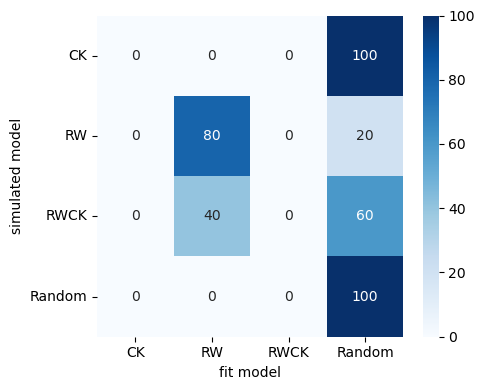

In [139]:
model_recovery_table = pd.read_csv( './data/model_recovery.csv' )
n_simulations = model_recovery_table[ 'simulation' ].max() +1

# get confusion matrix
idx = model_recovery_table.groupby( ['simulated model', 'simulation'] )[ 'BIC' ].idxmin()
# print(idx)
model_recovery_table = model_recovery_table.loc[ idx ]
# print(model_recovery_table)
confusion_matrix_long = model_recovery_table.groupby( ['simulated model', 'fit model' ] )['BIC'].count().reset_index(name="count")
for model1 in confusion_matrix_long['simulated model'].unique() :
    for model2 in confusion_matrix_long['simulated model'].unique() :
        # print(confusion_matrix_long[confusion_matrix_long['simulated model'] == model1]['fit model'].unique())
        if model2 not in confusion_matrix_long[confusion_matrix_long['simulated model'] == model1]['fit model'].unique() :
            confusion_matrix_long = confusion_matrix_long.append({'simulated model': model1, 'fit model': model2, 'count': 0}, ignore_index=True)
confusion_matrix_long['percent'] = 100*confusion_matrix_long['count'] / n_simulations
# print(confusion_matrix_long) 
confusion_matrix = confusion_matrix_long.pivot(index='simulated model', columns='fit model', values='percent').fillna(0)

#plot confusion matrix
plt.rcParams["figure.figsize"] = [5.0, 4.0]
plt.rcParams["figure.autolayout"] = True
sns.heatmap( confusion_matrix, fmt='1g', annot= True, cmap='Blues')
plt.yticks(rotation=0)


We observe that RW and RWCK are hard to distinguish. So comparing them does not make so much sense in our context. 


<center><img src="images/pipeline.png" width="700"/></center> 

<center><strong>Figure 7:</strong> Adapted fron Wilson and Collins. Process for using computional modeling to better understand behavior. </center> 


# END
You are now ready to properly evaluate and compare computational models in HCI!
Thanks for your participation